In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor

import os
from data import processing_data
# Loading our dataset

data_path =  "movies_data_processed_v3.csv"
df = pd.read_csv(data_path)
df.head()

,genres,rating,no_of_votes,meta_score,release_date,gross,budget,countries,log_budget,log_no_of_votes,log_gross,log_gross_bin
0,"Martial Arts, Action, Comedy",5.3,6800,34.0,2025.0,17235040.0,18000000.0,United States,16.705882,8.824825,16.662455,3
1,"Action, Drama, Romance, Thriller, Western",6.5,107000,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",17.281246,11.580593,16.740635,3
2,"Animal Adventure, Computer Animation, Fairy Ta...",7.8,200000,73.0,2022.0,481757663.0,90000000.0,"United States, Japan",18.315320,12.206078,19.992952,9
3,"Sci-Fi Epic, Space Sci-Fi, Action, Adventure, ...",7.6,524000,52.0,1997.0,263920180.0,25000000.0,"France, United Kingdom",17.034386,13.169249,19.391157,8
4,"Sci-Fi Epic, Superhero, Urban Adventure, Actio...",7.4,195000,82.0,1978.0,300478449.0,55000000.0,"United States, United Kingdom, Switzerland, Pa...",17.822844,12.180760,19.520887,8


| Siêu tham số           | Ý nghĩa                                                                 | Giá trị phổ biến / Mặc định       | Ảnh hưởng đến mô hình                                                        |
|------------------------|------------------------------------------------------------------------|-----------------------------------|--------------------------------------------------------------------------------|
| `criterion`            | Hàm mất mát dùng để chia nhánh                                         | `'squared_error'`, `'friedman_mse'`, `'absolute_error'`, `'poisson'` | Ảnh hưởng đến cách đo lỗi khi chia node                                       |
| `splitter`             | Chiến lược chọn điểm chia                                              | `'best'`, `'random'`              | `best` chọn chia tốt nhất; `random` tạo tính ngẫu nhiên                      |
| `max_depth`            | Độ sâu tối đa của cây                                                  | `None`, số nguyên (ví dụ: 5, 10)  | Giới hạn này tránh overfitting, giảm độ phức tạp                             |
| `min_samples_split`    | Số mẫu tối thiểu để chia một node                                      | `2`, `5`, `10`                    | Giá trị cao giúp cây tổng quát hơn                                            |
| `min_samples_leaf`     | Số mẫu tối thiểu tại một lá                                            | `1`, `3`, `5`                     | Tăng để tránh node chứa quá ít mẫu, giảm overfitting                         |
| `max_features`         | Số lượng đặc trưng xem xét khi chia node                              | `'auto'`, `'sqrt'`, `'log2'`, `None` | Giới hạn này làm cây bớt phức tạp, tăng tính ngẫu nhiên nếu không là `None` |
| `max_leaf_nodes`       | Số lượng node lá tối đa                                                | `None`, số nguyên                 | Giới hạn số node lá để kiểm soát độ phức tạp                                 |
| `min_weight_fraction_leaf` | Tỷ lệ trọng số tối thiểu của một lá                                 | `0.0`–`0.5`                       | Dùng khi dữ liệu có trọng số; tránh tạo lá quá nhỏ                           |
| `random_state`         | Hạt giống ngẫu nhiên                                                   | `None` hoặc số nguyên             | Giúp tái tạo kết quả                                                          |
| `ccp_alpha`            | Hệ số cắt tỉa cây theo chi phí phức tạp (pruning)                     | `0.0` trở lên                     | Tăng giá trị này giúp giảm overfitting bằng cách cắt bớt node phụ            |



Fold 1
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Training Metrics
R2 score: 0.6906
MSE: 2.9435
MLSE: 0.0151
MAPE: 0.09%
Test Metrics
R2 score: 0.6416
MSE: 3.3245
MLSE: 0.0196
MAPE: 0.10%


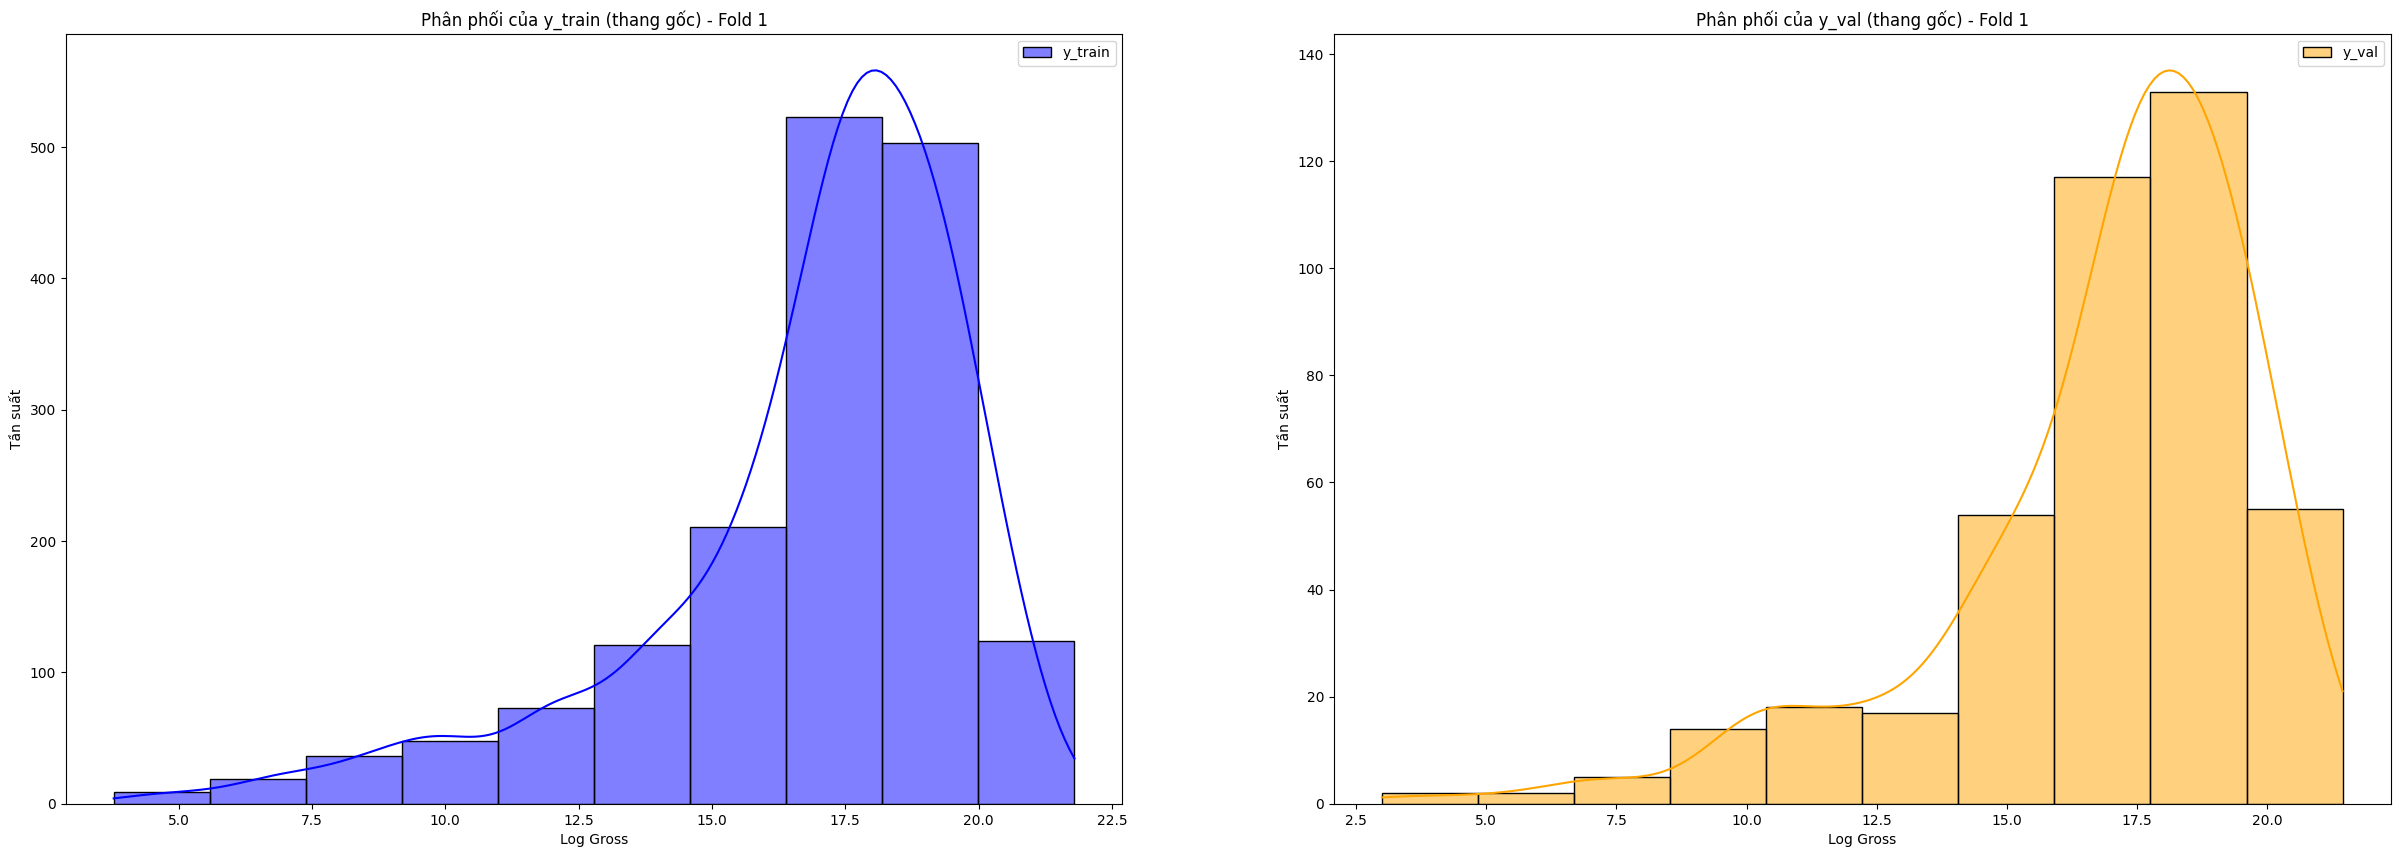

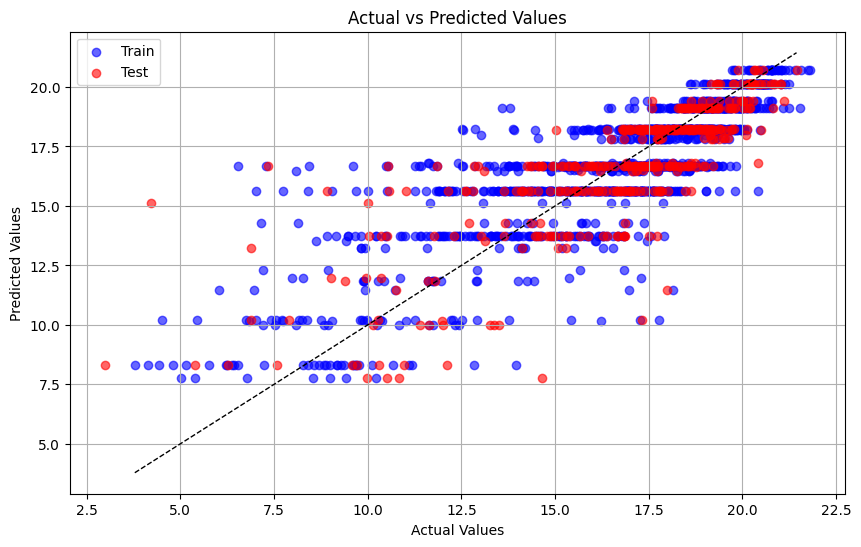

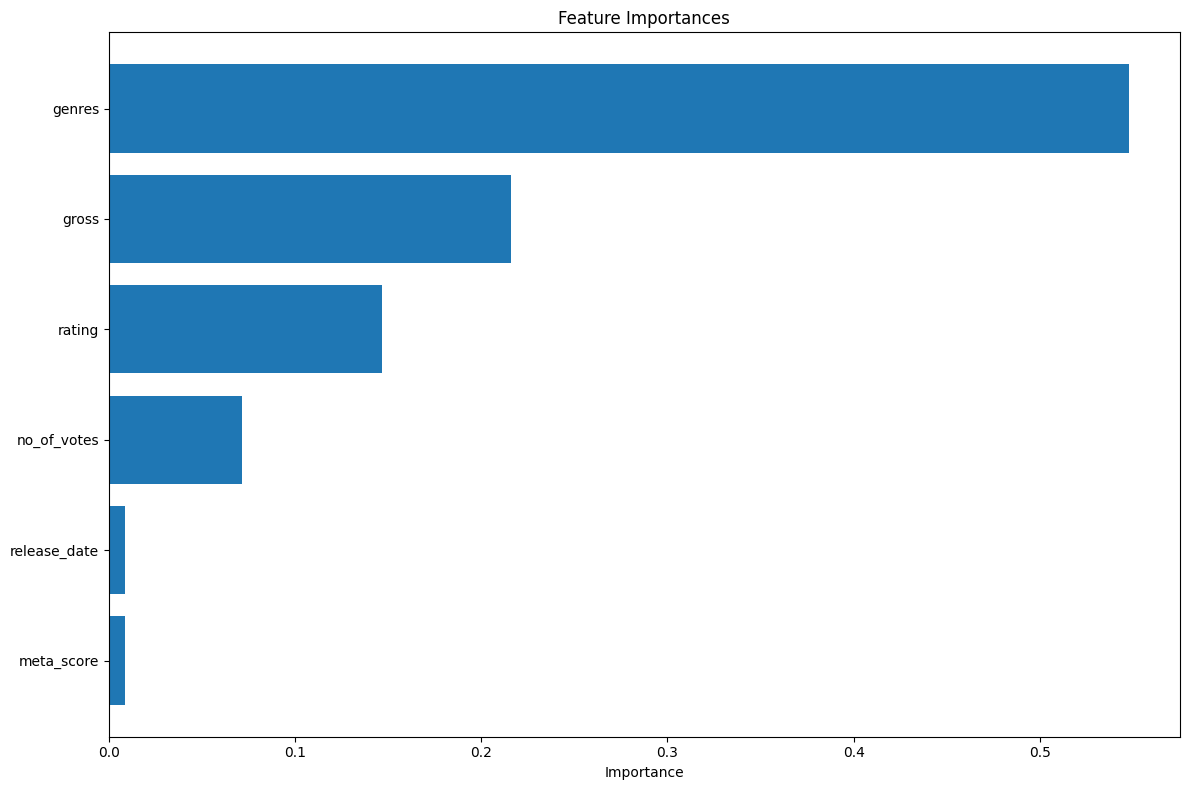


Fold 2
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Training Metrics
R2 score: 0.6900
MSE: 2.8644
MLSE: 0.0150
MAPE: 0.09%
Test Metrics
R2 score: 0.6201
MSE: 3.9378
MLSE: 0.0222
MAPE: 0.10%


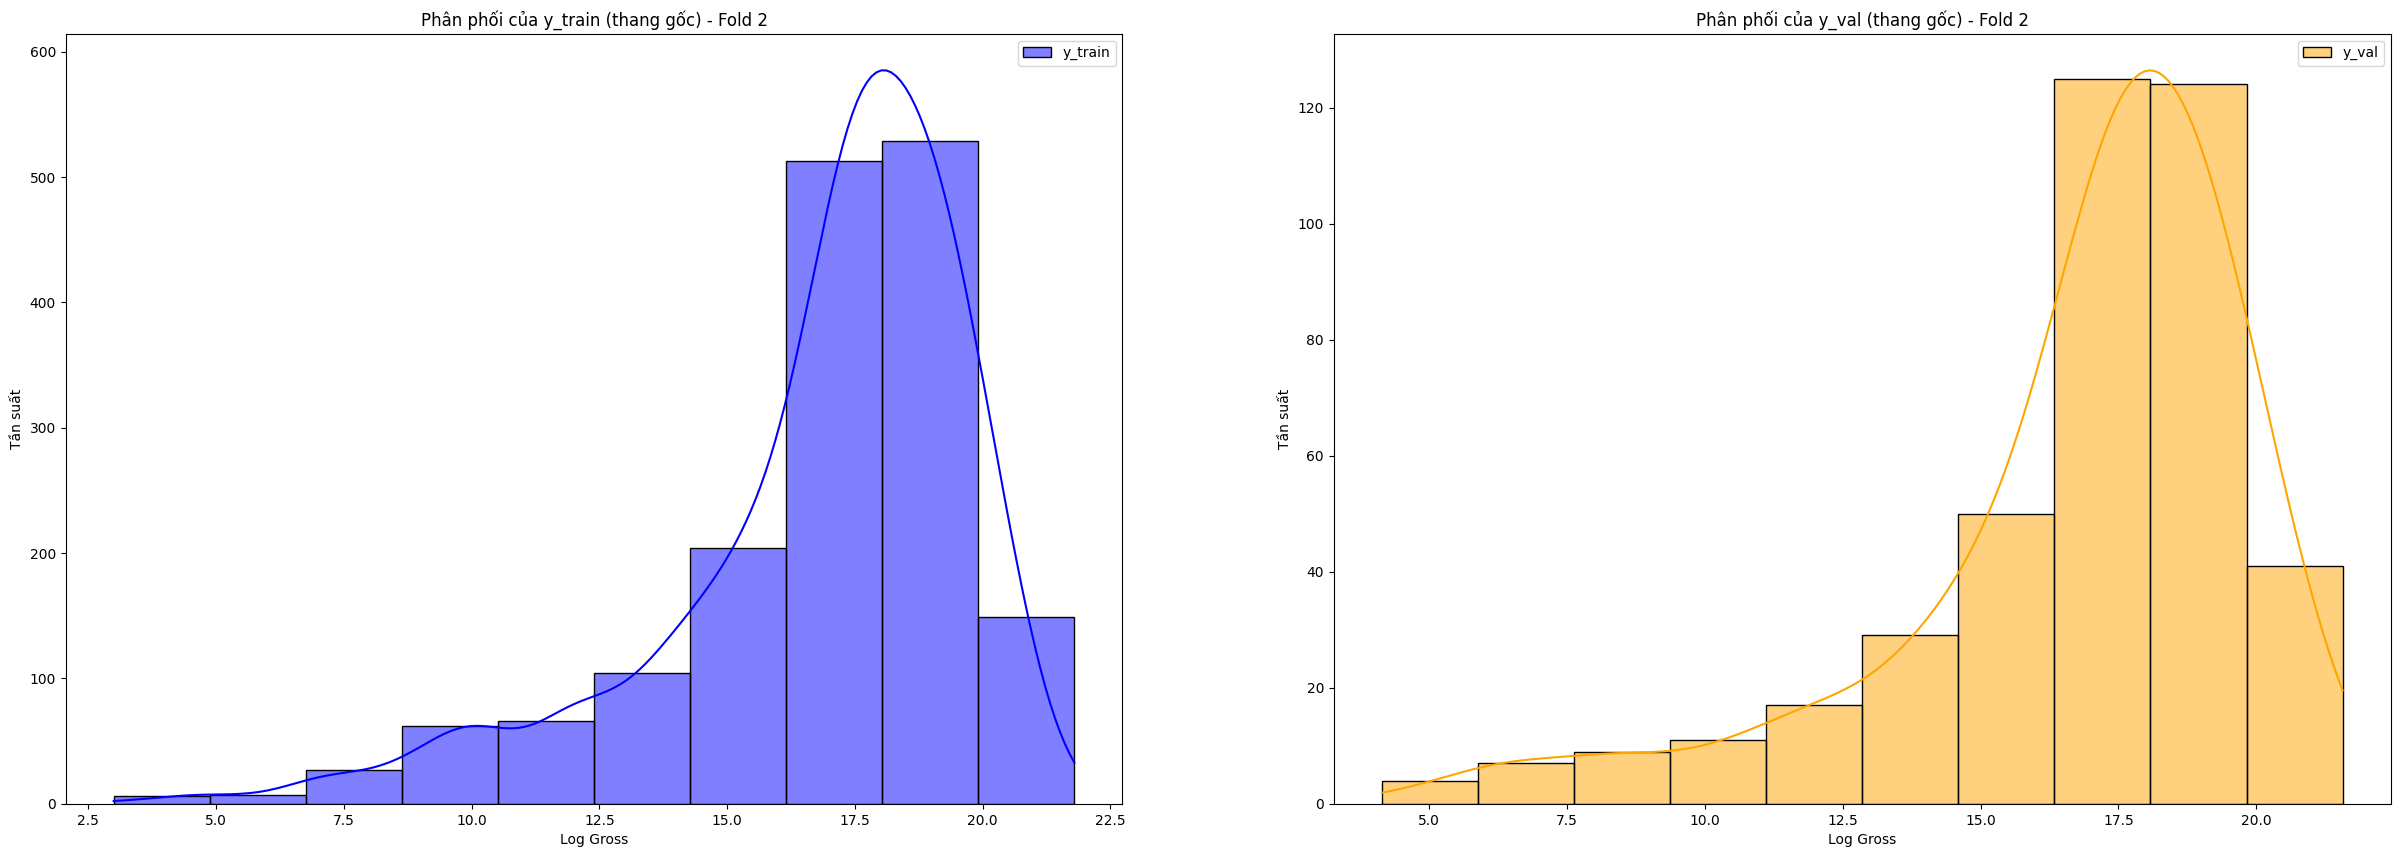

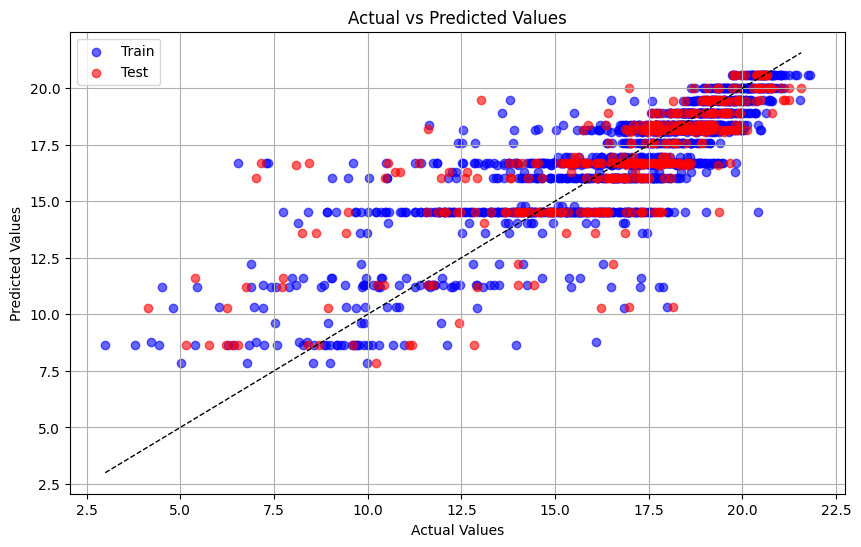

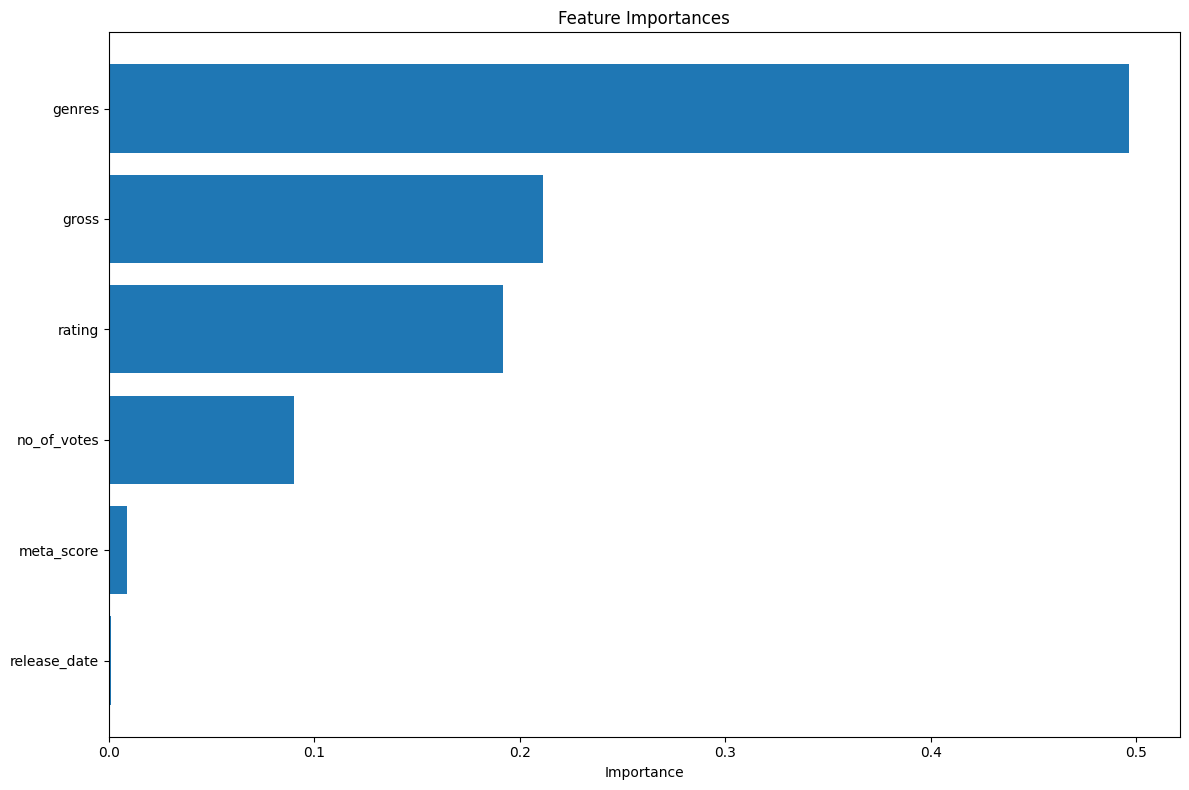


Fold 3
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Training Metrics
R2 score: 0.7004
MSE: 2.8899
MLSE: 0.0152
MAPE: 0.09%
Test Metrics
R2 score: 0.6352
MSE: 3.1918
MLSE: 0.0161
MAPE: 0.09%


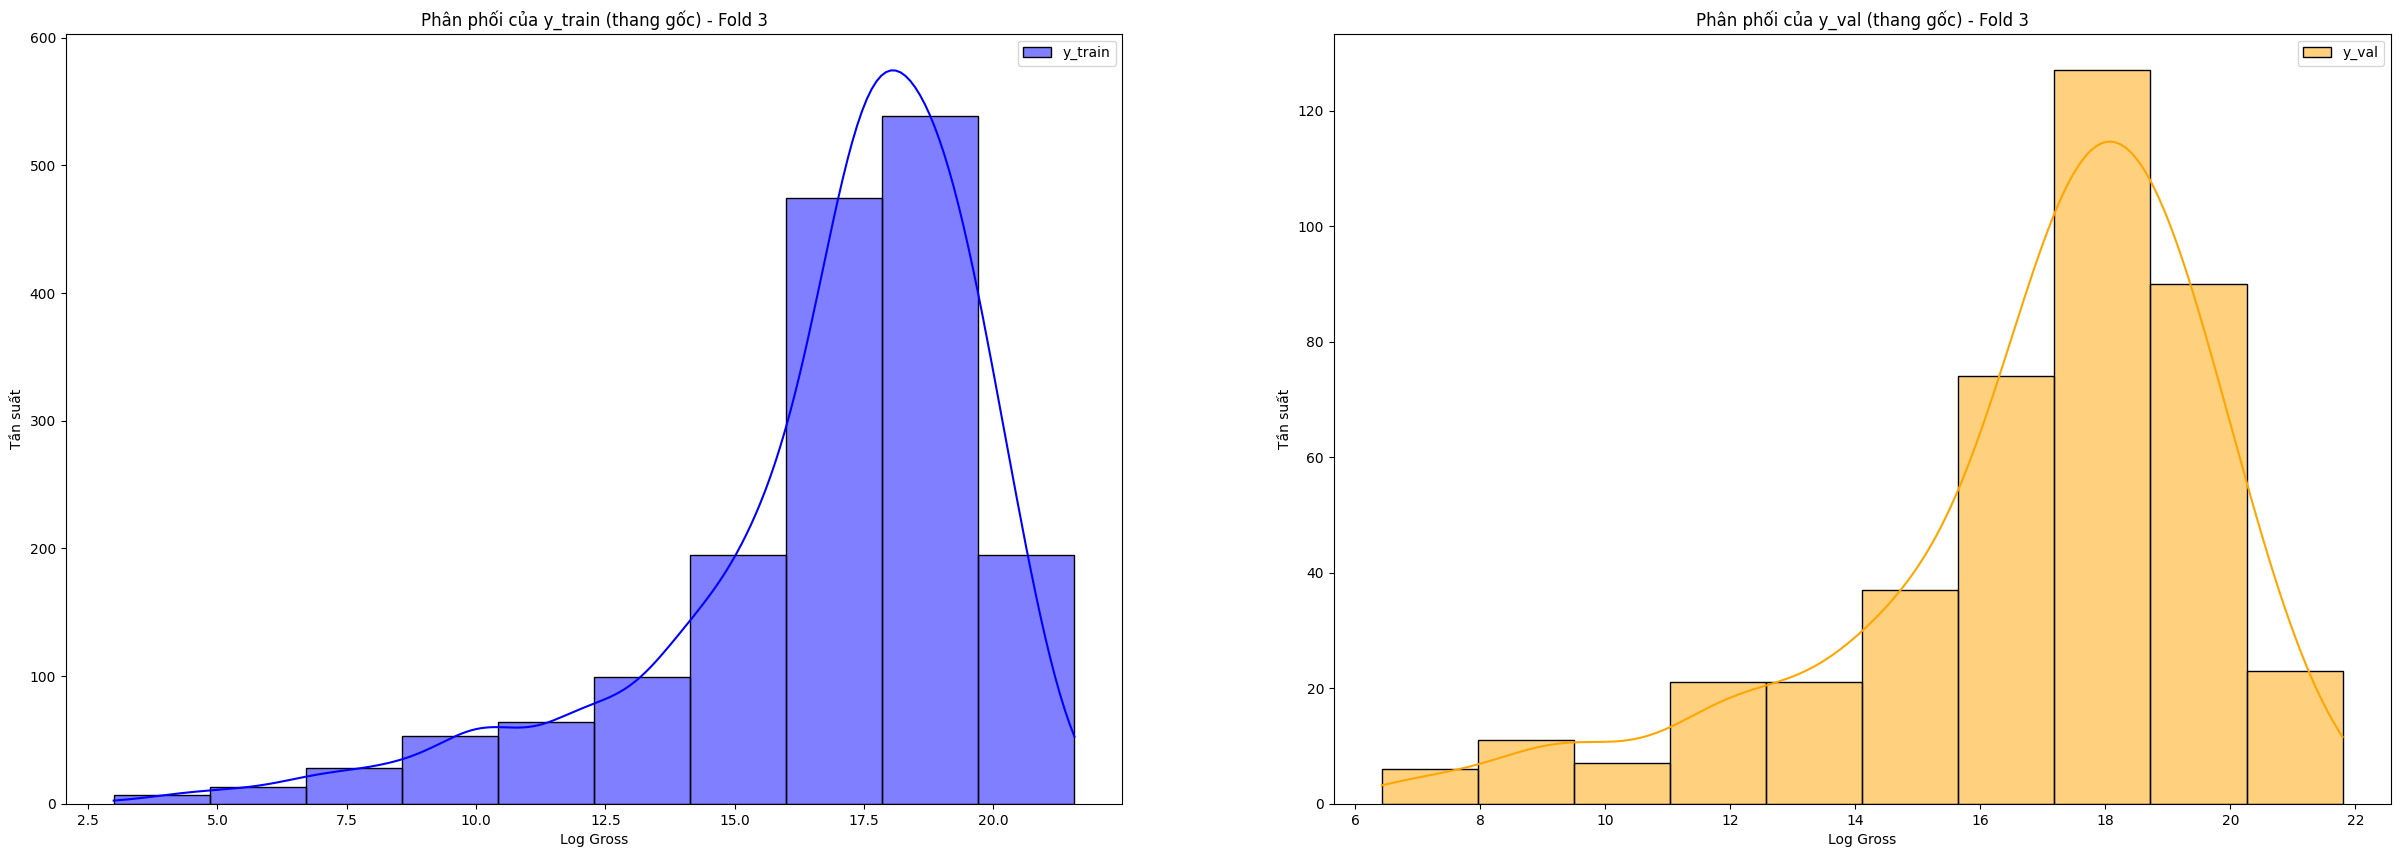

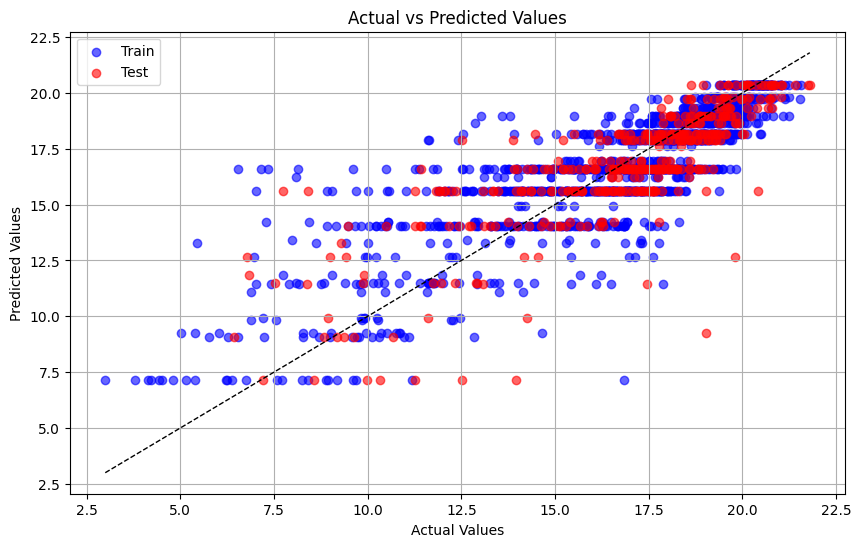

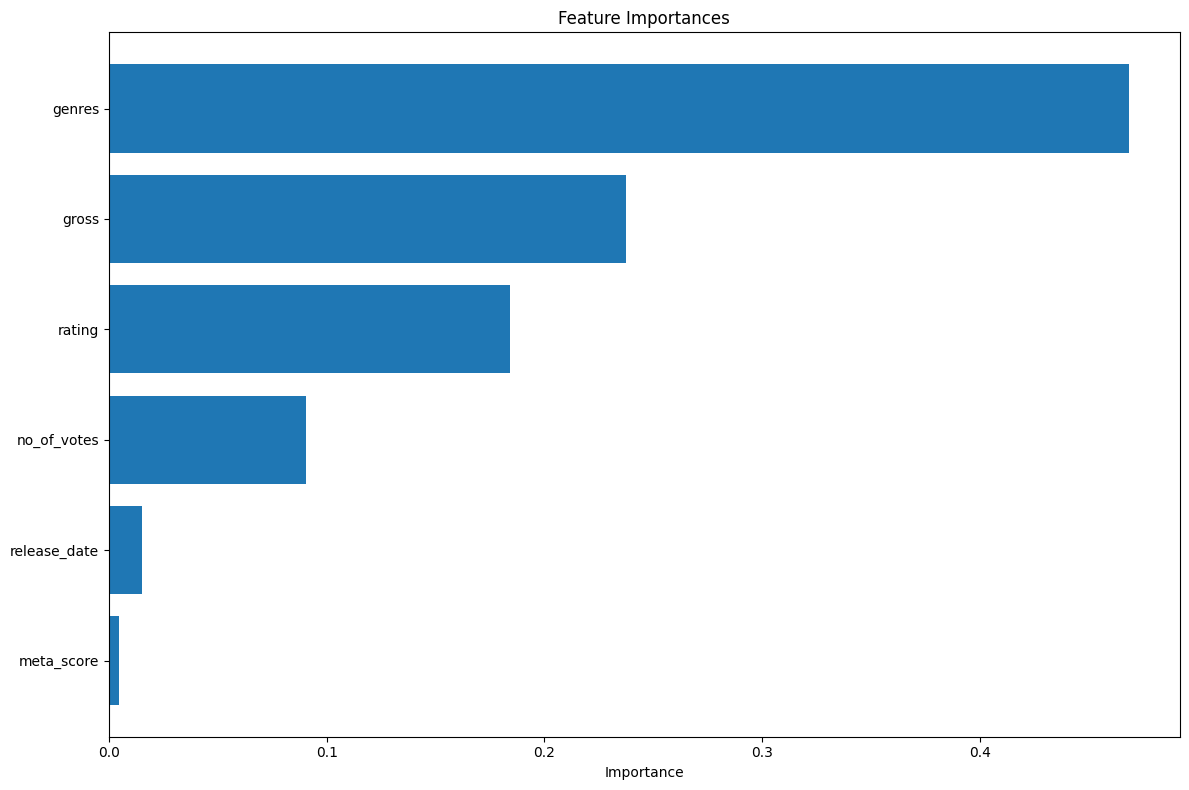


Fold 4
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Training Metrics
R2 score: 0.7135
MSE: 2.6942
MLSE: 0.0138
MAPE: 0.08%
Test Metrics
R2 score: 0.4995
MSE: 4.8614
MLSE: 0.0296
MAPE: 0.11%


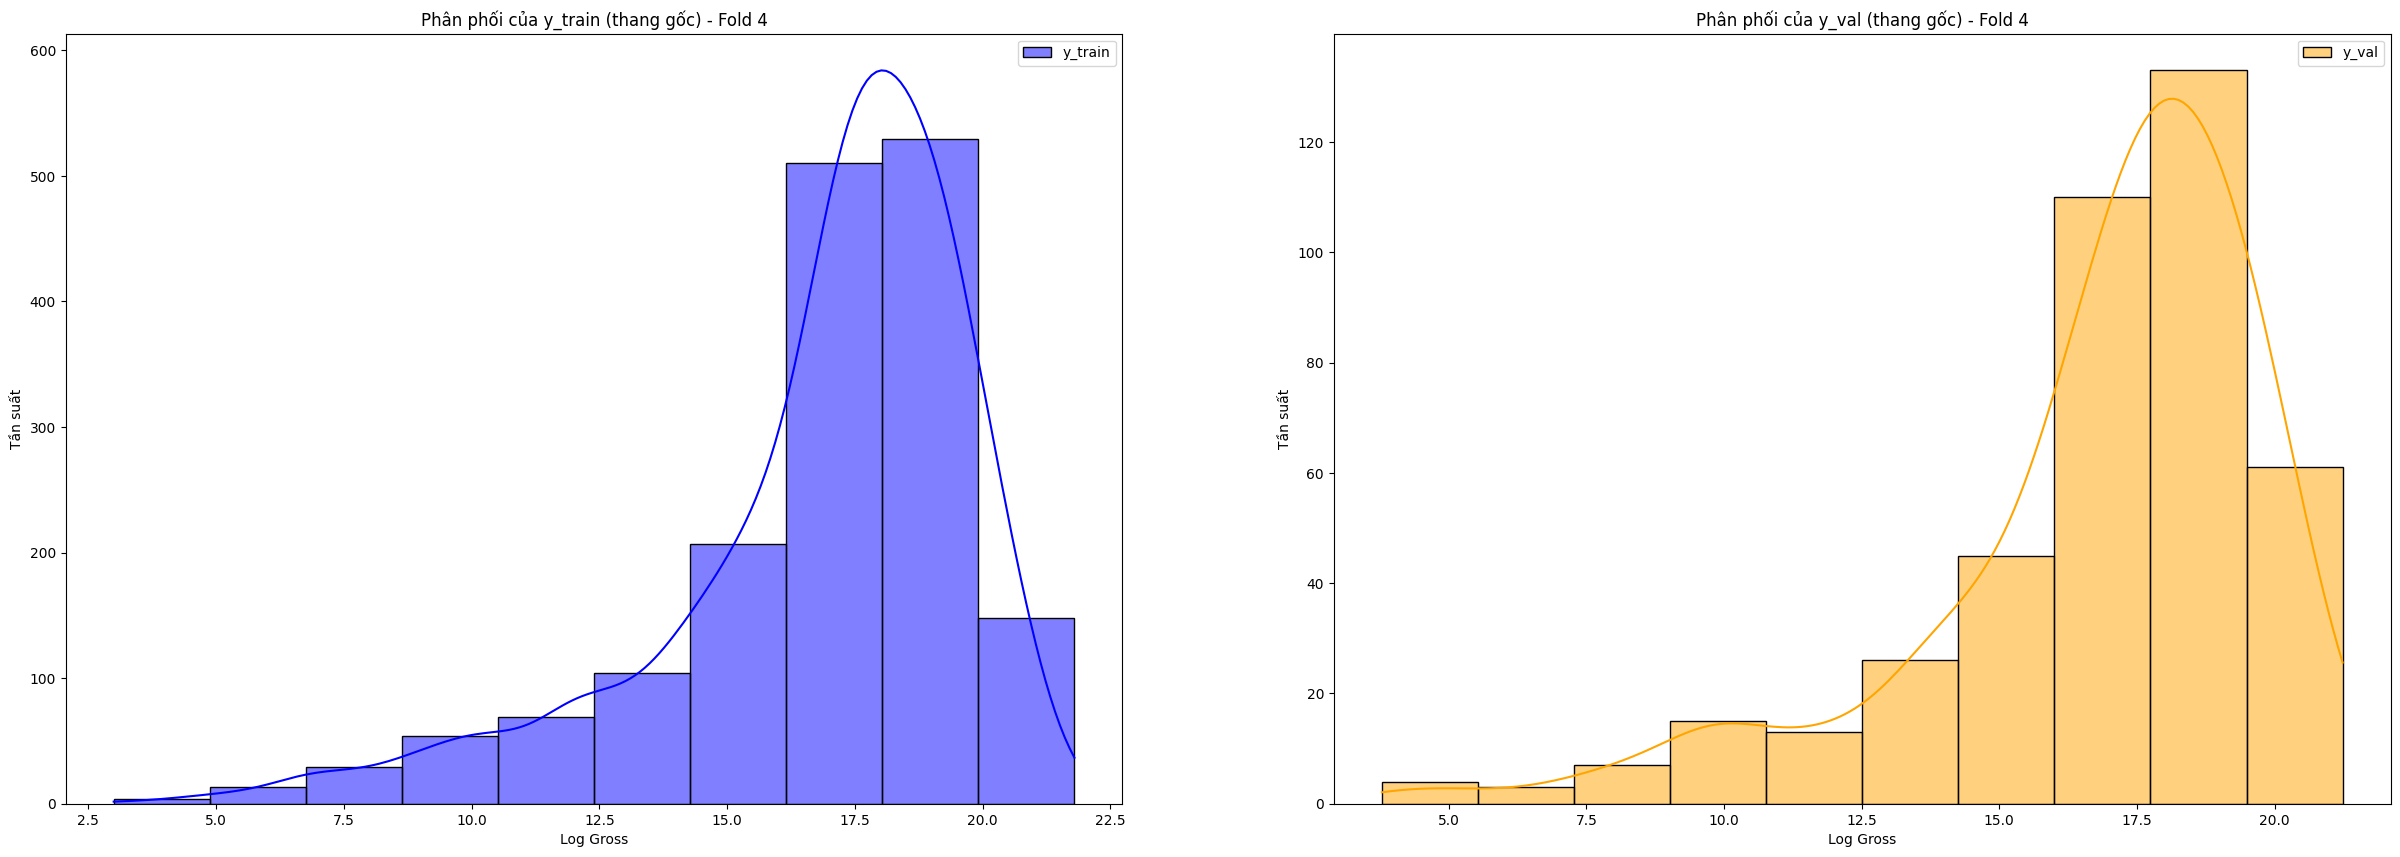

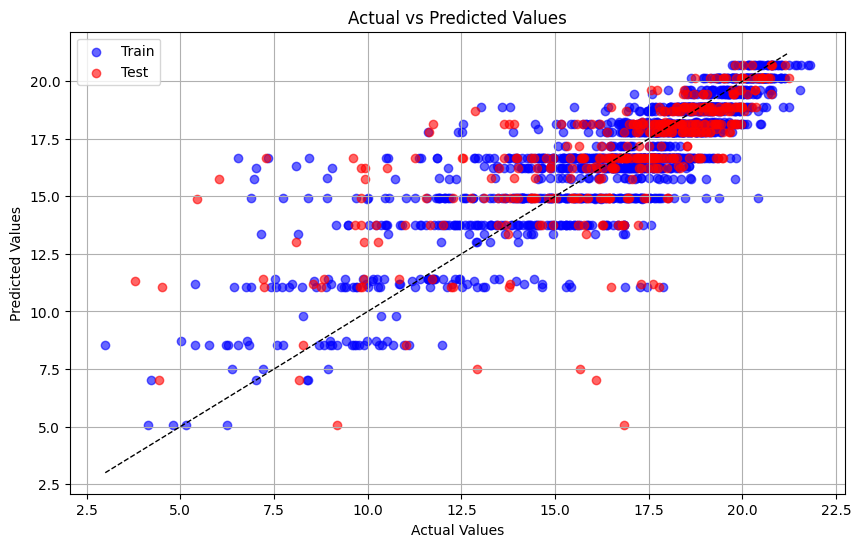

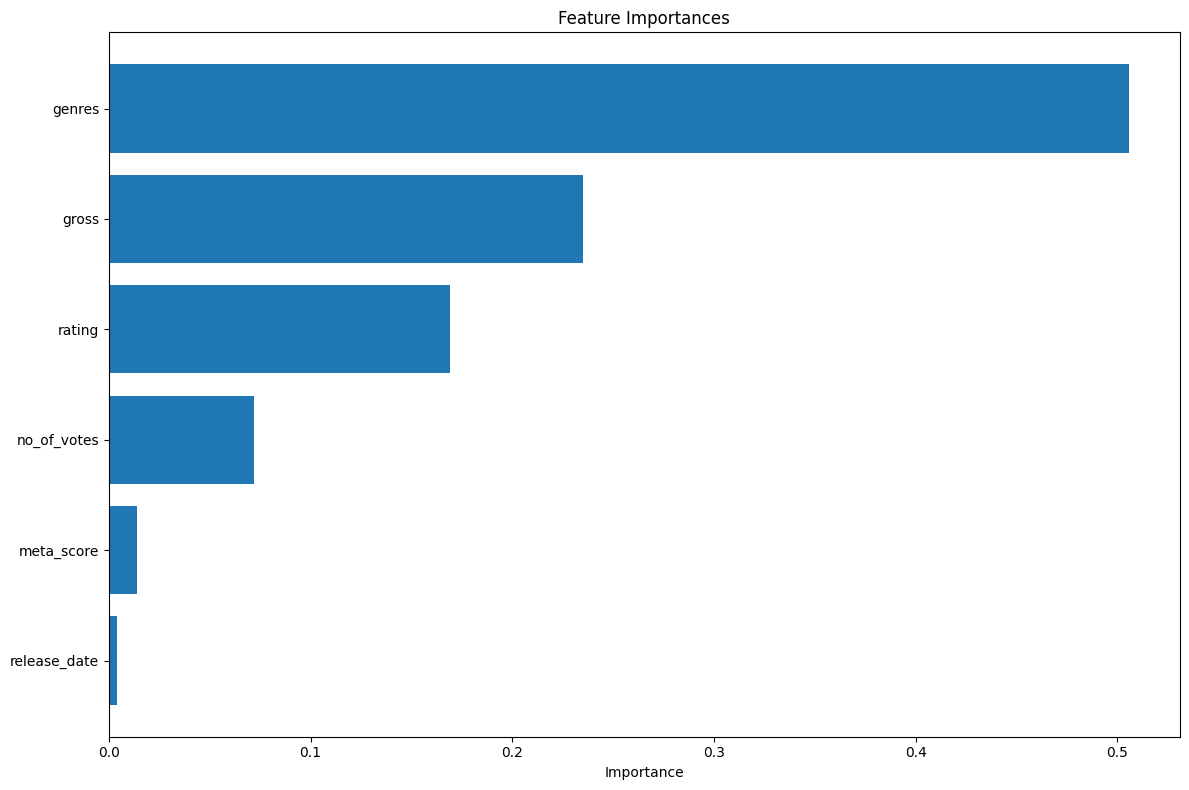


Fold 5
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Metrics
R2 score: 0.7248
MSE: 2.6216
MLSE: 0.0141
MAPE: 0.08%
Test Metrics
R2 score: 0.5152
MSE: 4.4693
MLSE: 0.0223
MAPE: 0.10%


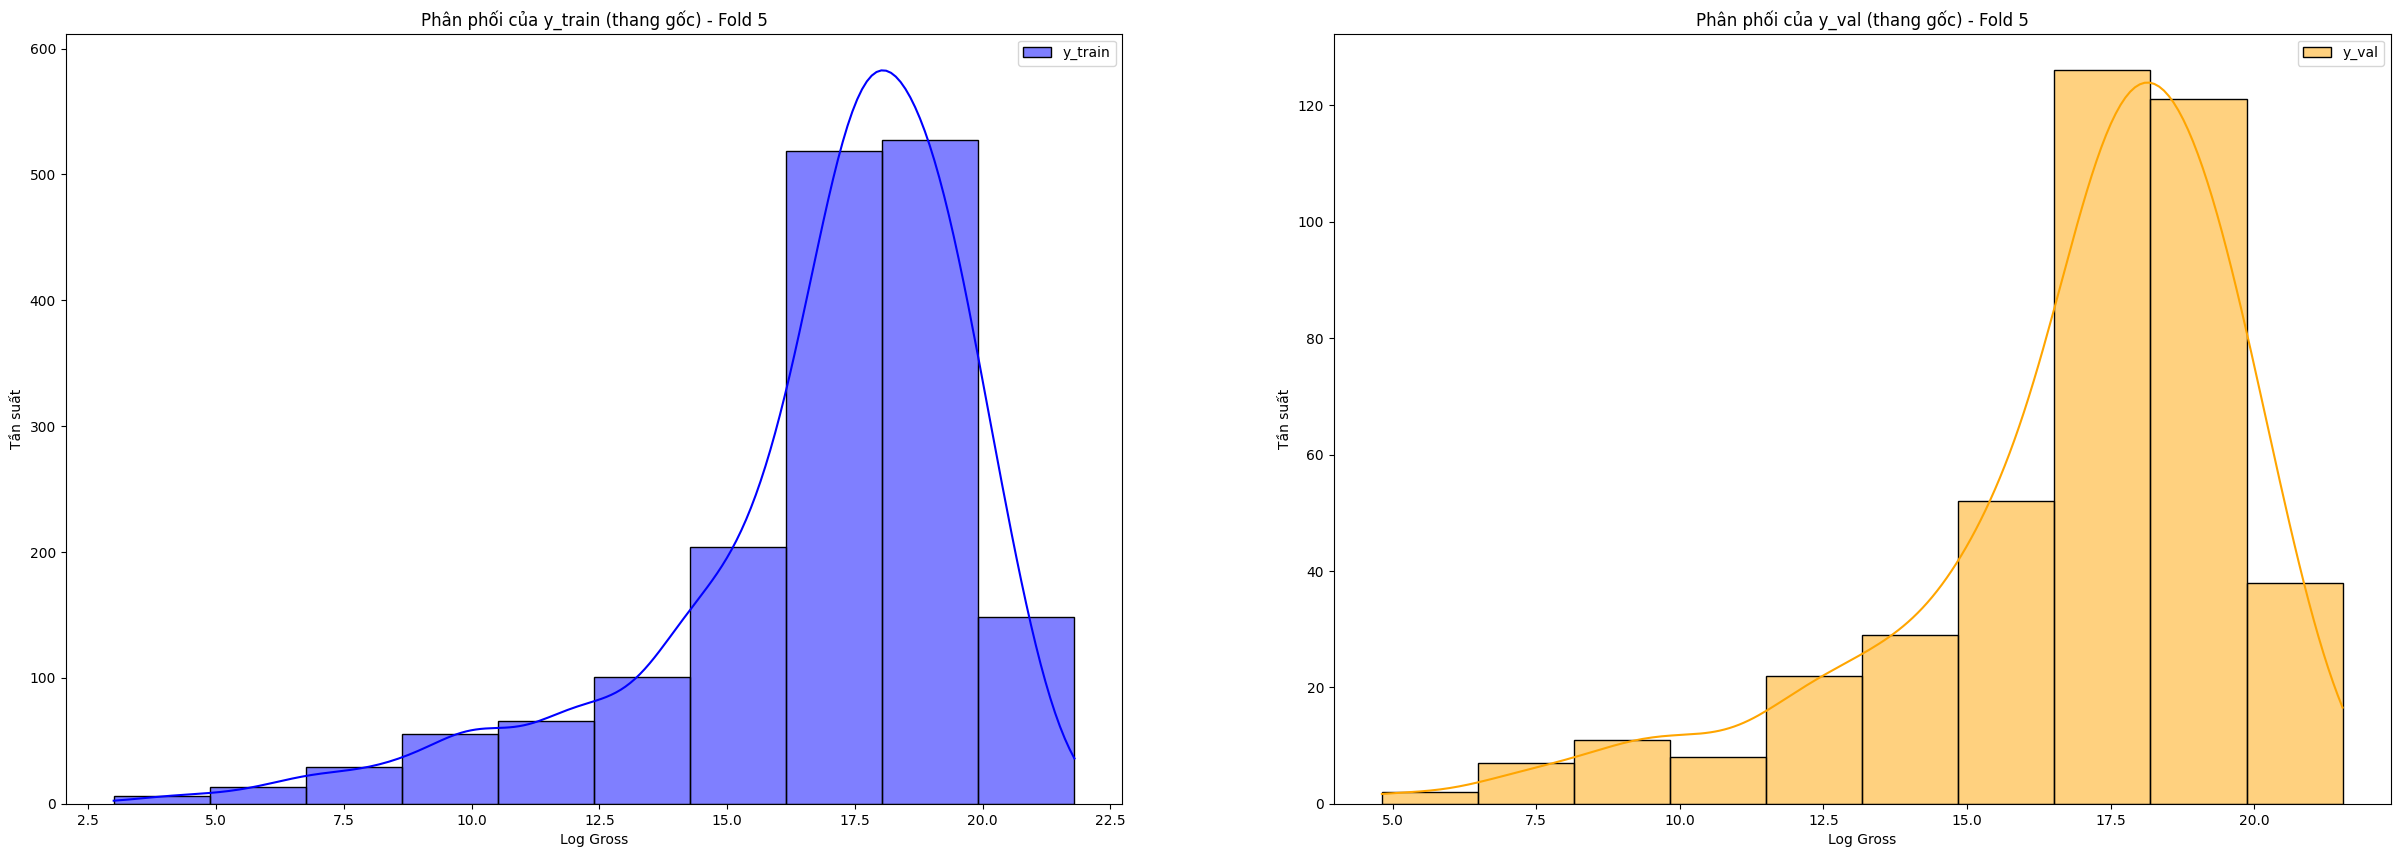

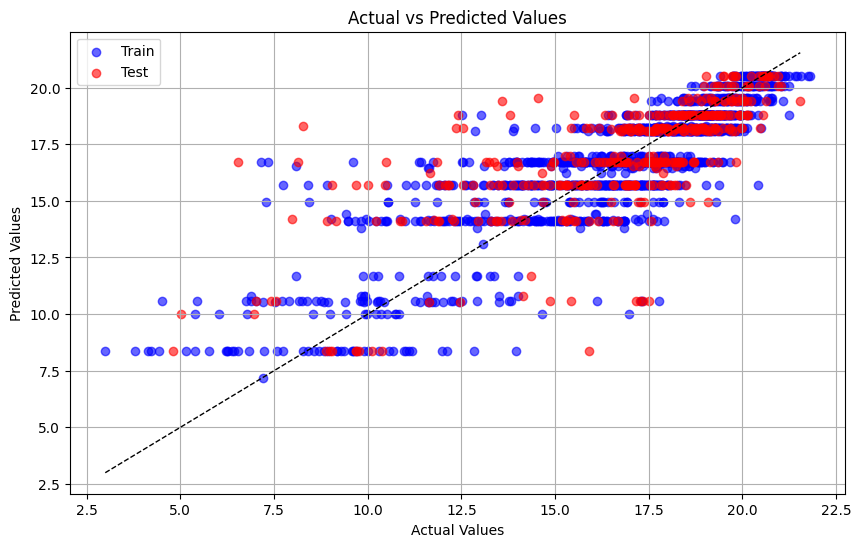

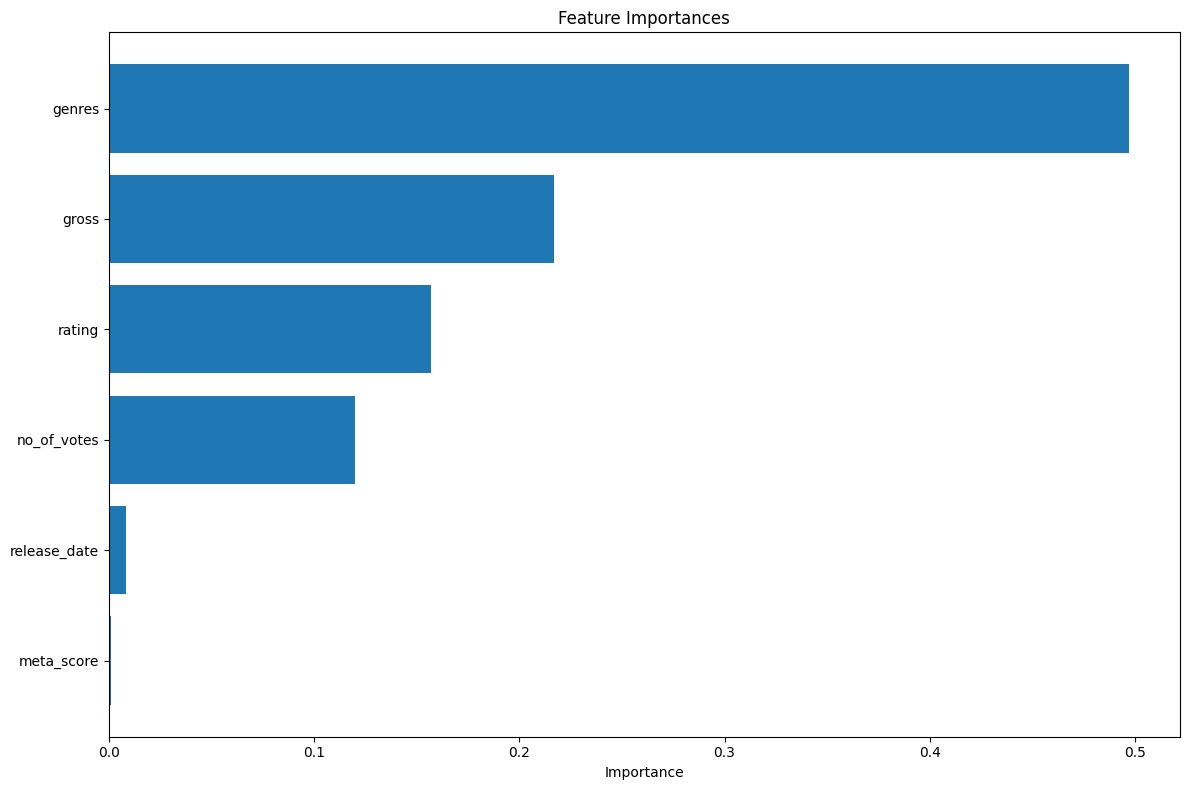

In [ ]:
from evaluation import visualize_results
from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid các siêu tham số cần thử
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
}

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"\nFold {fold + 1}")
    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()

    # Chọn đặc trưng đầu vào và mục tiêu
    #features = ['meta_score', 'rating', 'no_of_votes', 'budget', 'genre_stat_feature', 'country_stat_feature', 'release_date']
    features = ['no_of_votes', 'log_budget',
                'genre_stat_feature','country_stat_feature','rating','release_date']

    target = 'log_gross'

    X_train, y_train, X_val, y_val = processing_data(df_train, df_val, fold=fold,features=features, target=target)

    base_model = DecisionTreeRegressor(random_state=42)
    grid_search = GridSearchCV(
        base_model,
        param_grid,
        scoring='neg_mean_squared_error',
        cv=3,  # CV nội bộ
        n_jobs=-1,
        verbose=0
    )
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print("Best hyperparameters:", grid_search.best_params_)

   
    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)

    visualize_results(
        y_train, train_preds,
        y_val, val_preds,
        model=best_model,
        df=df,
        is_logged=False,
    )

| Siêu tham số           | Ý nghĩa                                                                 | Giá trị phổ biến / Mặc định       | Ảnh hưởng đến mô hình                                                        |
|------------------------|------------------------------------------------------------------------|-----------------------------------|--------------------------------------------------------------------------------|
| `n_estimators`         | Số lượng cây trong rừng                                                | `[50, 100, 200, 300]` (mặc định: 100) | Tăng số lượng cây giúp mô hình ổn định hơn nhưng huấn luyện lâu hơn         |
| `max_depth`            | Độ sâu tối đa của cây                                                  | `[None, 5, 10, 15]`               | Giới hạn độ sâu tránh overfitting; `None` cho phép cây phát triển tối đa    |
| `min_samples_split`    | Số mẫu tối thiểu để chia một node                                      | `[2, 5, 10]`                      | Giá trị lớn làm cây bớt phức tạp, tránh chia nhỏ quá mức                     |
| `min_samples_leaf`     | Số mẫu tối thiểu tại một node lá                                       | `[1, 3, 5]`                       | Tăng giá trị giúp cây tổng quát hơn, giảm overfitting                        |
| `max_features`         | Số lượng đặc trưng được xét tại mỗi lần chia node                      | `['sqrt', 'log2', None]`         | Tăng tính ngẫu nhiên, giúp đa dạng hóa cây và giảm overfitting               |
| `bootstrap`            | Có sử dụng lấy mẫu có hoàn lại không                                   | `[True, False]`                  | `True` giúp đa dạng hóa cây (giảm overfitting), `False` dùng toàn bộ dữ liệu |
| `criterion`            | Hàm mất mát để đánh giá chất lượng node                               | `['squared_error', 'absolute_error']` | `squared_error` nhạy với outlier; `absolute_error` bền vững hơn với outlier  |
| `max_leaf_nodes`       | Số lượng node lá tối đa (giới hạn cấu trúc cây)                        | `None` hoặc số nguyên dương       | Giới hạn này giúp kiểm soát độ phức tạp mô hình                              |
| `n_jobs`               | Số luồng CPU sử dụng để train song song                                | `-1` (tất cả CPU)                | Tăng tốc độ huấn luyện mô hình                                               |
| `random_state`         | Hạt giống ngẫu nhiên cho reproducibility                               | `42`, hoặc số bất kỳ             | Giúp kết quả có thể lặp lại khi huấn luyện nhiều lần                         |



 Fold 1
Fitting 3 folds for each of 24 candidates, totalling 72 fits
 Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
Training Metrics
R2 score: 0.8470
MSE: 1.4555
MLSE: 0.0089
MAPE: 0.06%
Test Metrics
R2 score: 0.7262
MSE: 2.5400
MLSE: 0.0156
MAPE: 0.08%


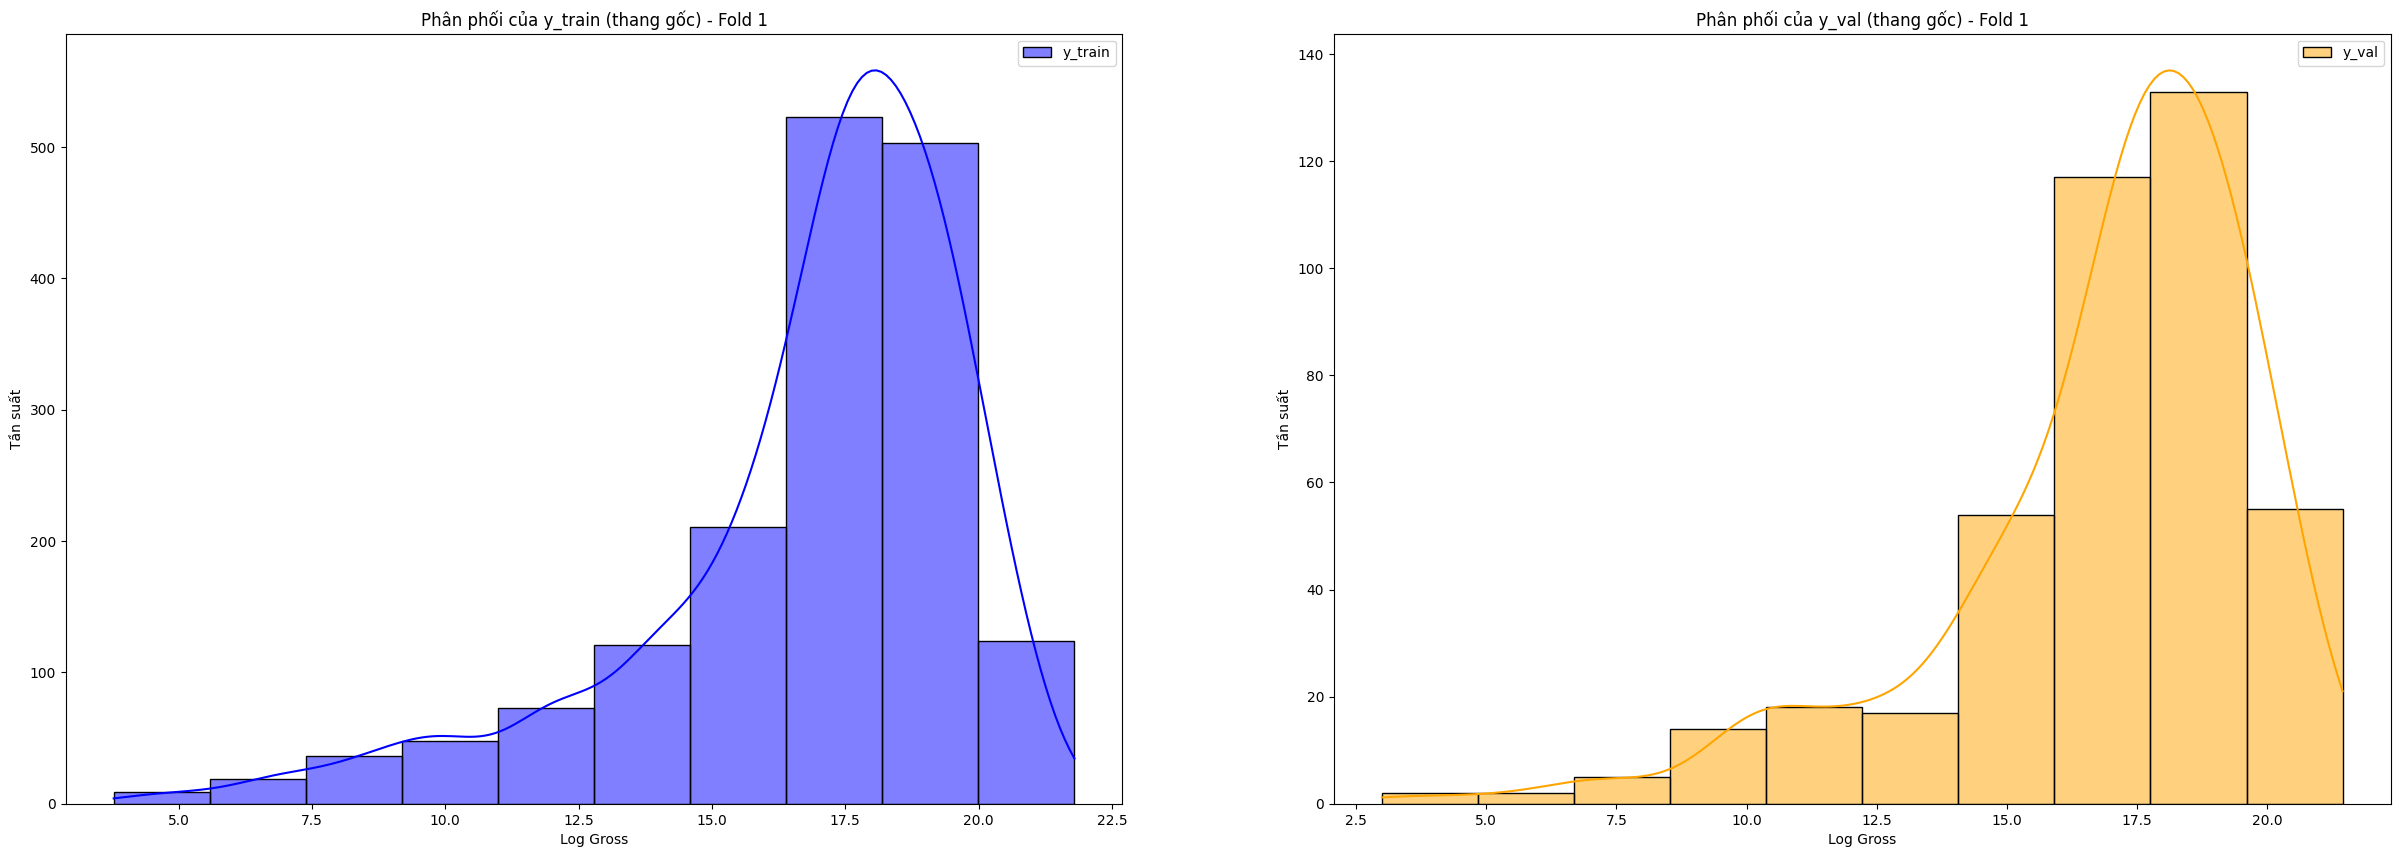

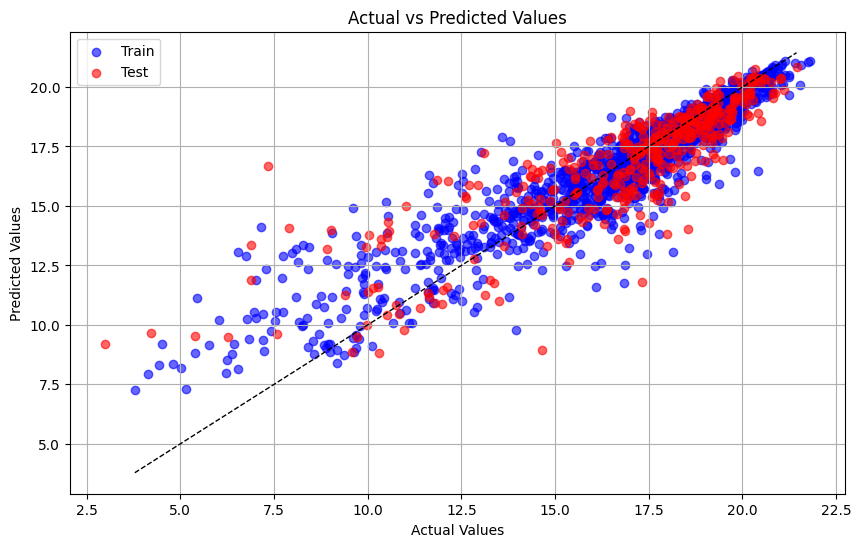

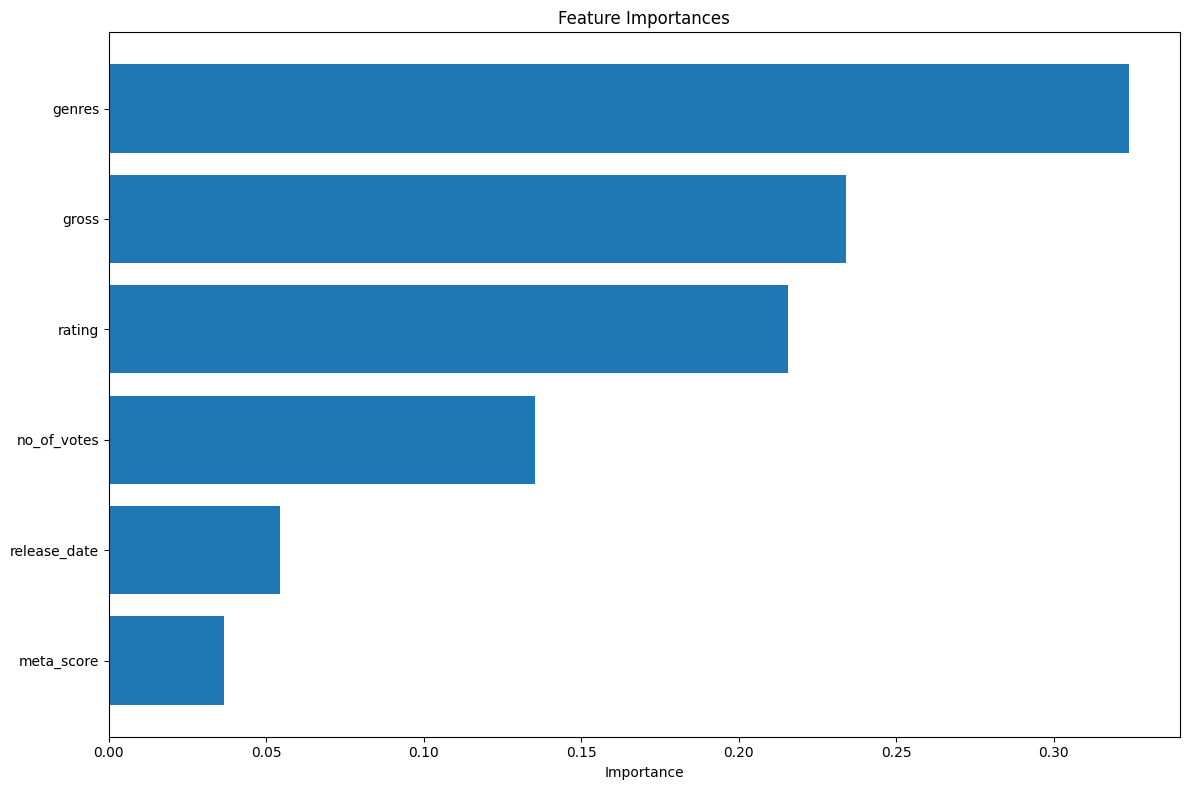


 Fold 2
Fitting 3 folds for each of 24 candidates, totalling 72 fits
 Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training Metrics
R2 score: 0.9558
MSE: 0.4084
MLSE: 0.0027
MAPE: 0.03%
Test Metrics
R2 score: 0.6683
MSE: 3.4381
MLSE: 0.0196
MAPE: 0.09%


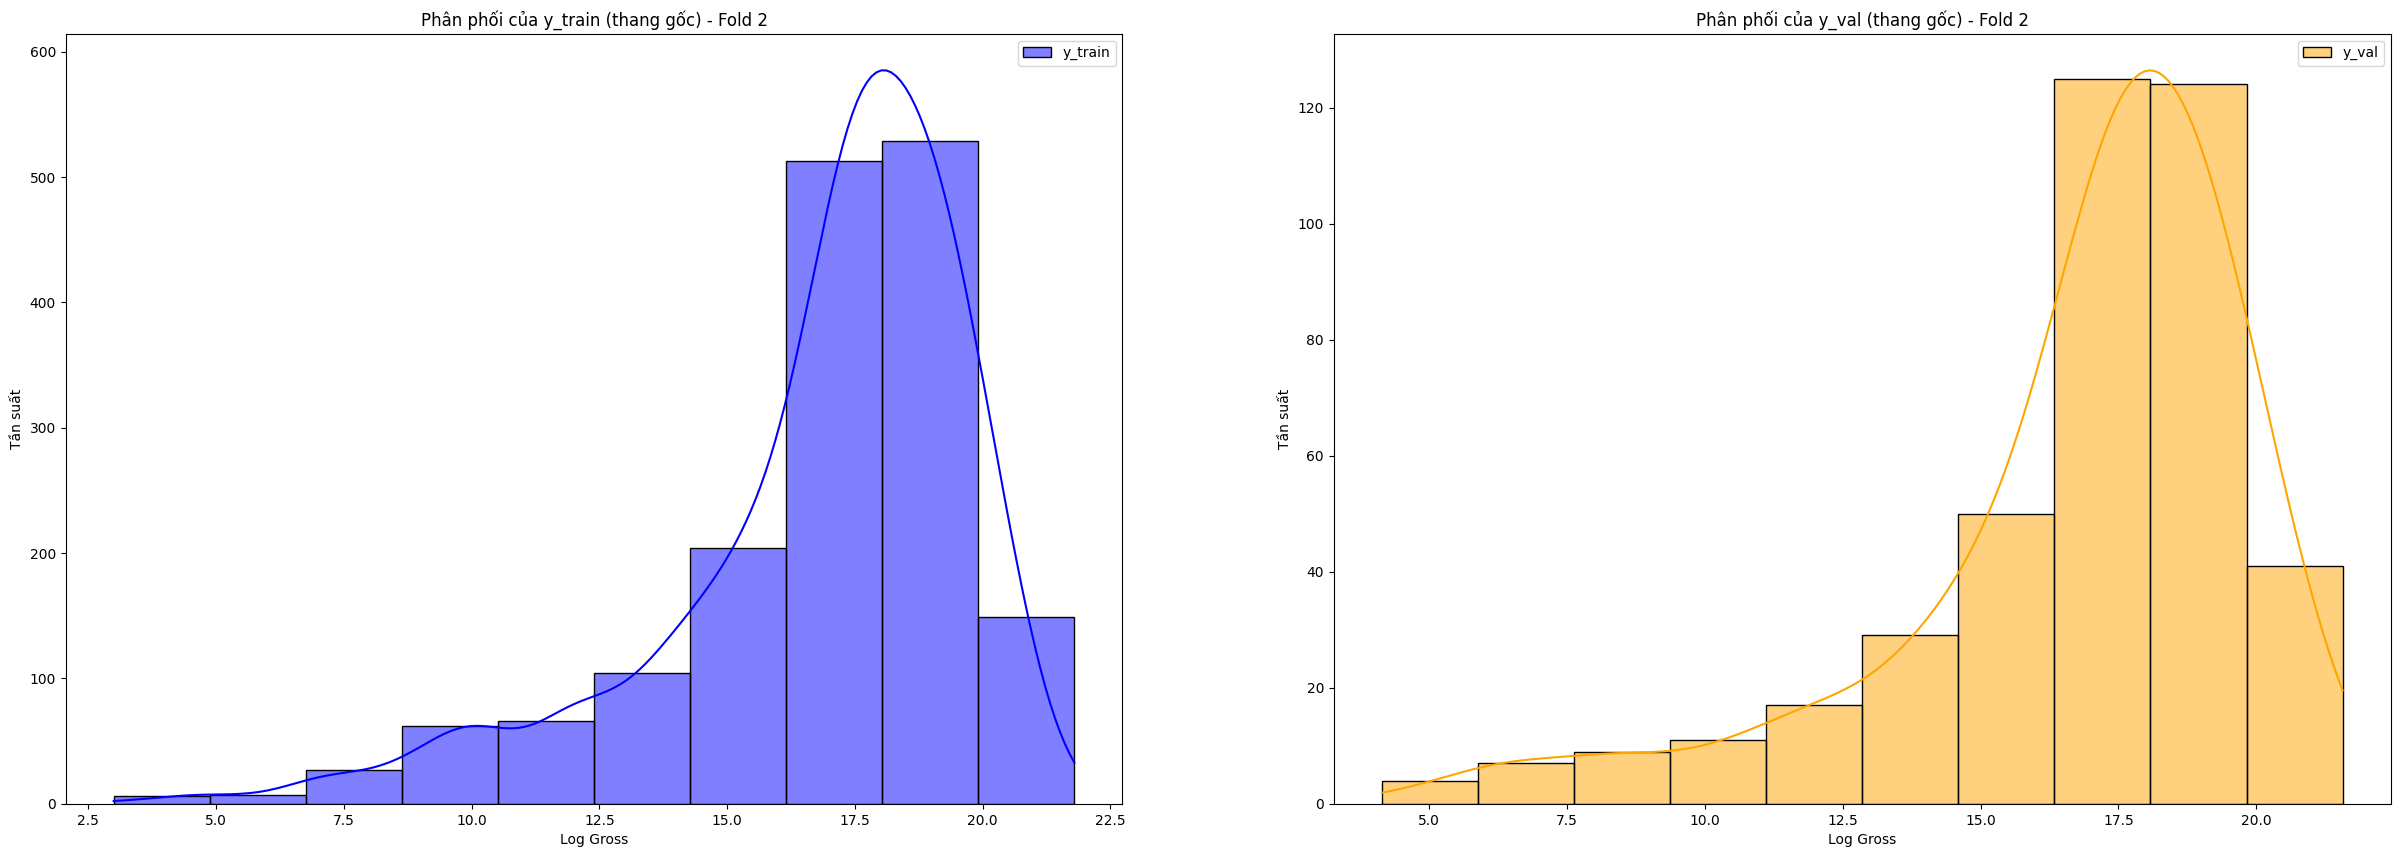

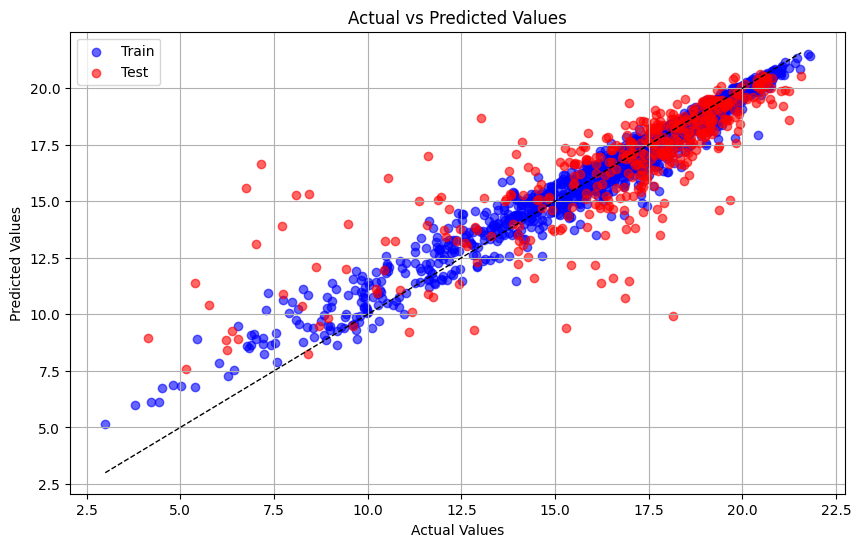

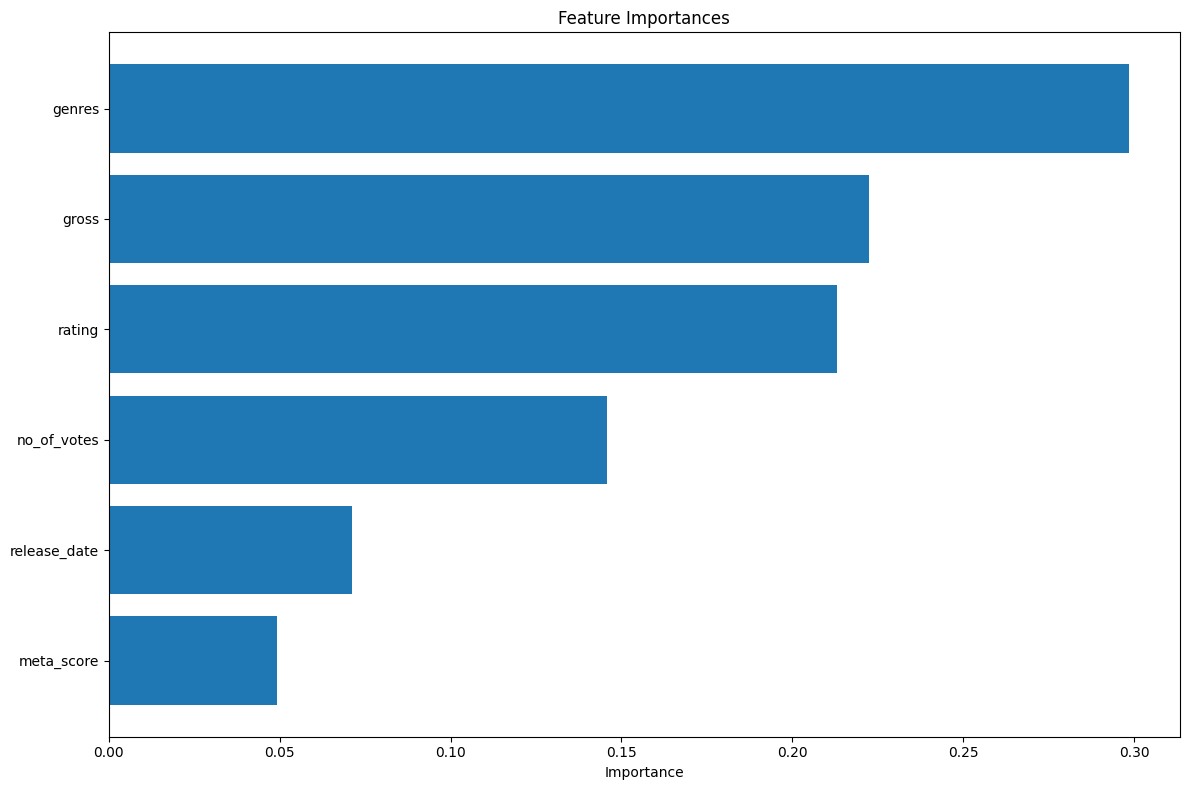


 Fold 3
Fitting 3 folds for each of 24 candidates, totalling 72 fits
 Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training Metrics
R2 score: 0.8650
MSE: 1.3018
MLSE: 0.0075
MAPE: 0.06%
Test Metrics
R2 score: 0.7025
MSE: 2.6031
MLSE: 0.0127
MAPE: 0.08%


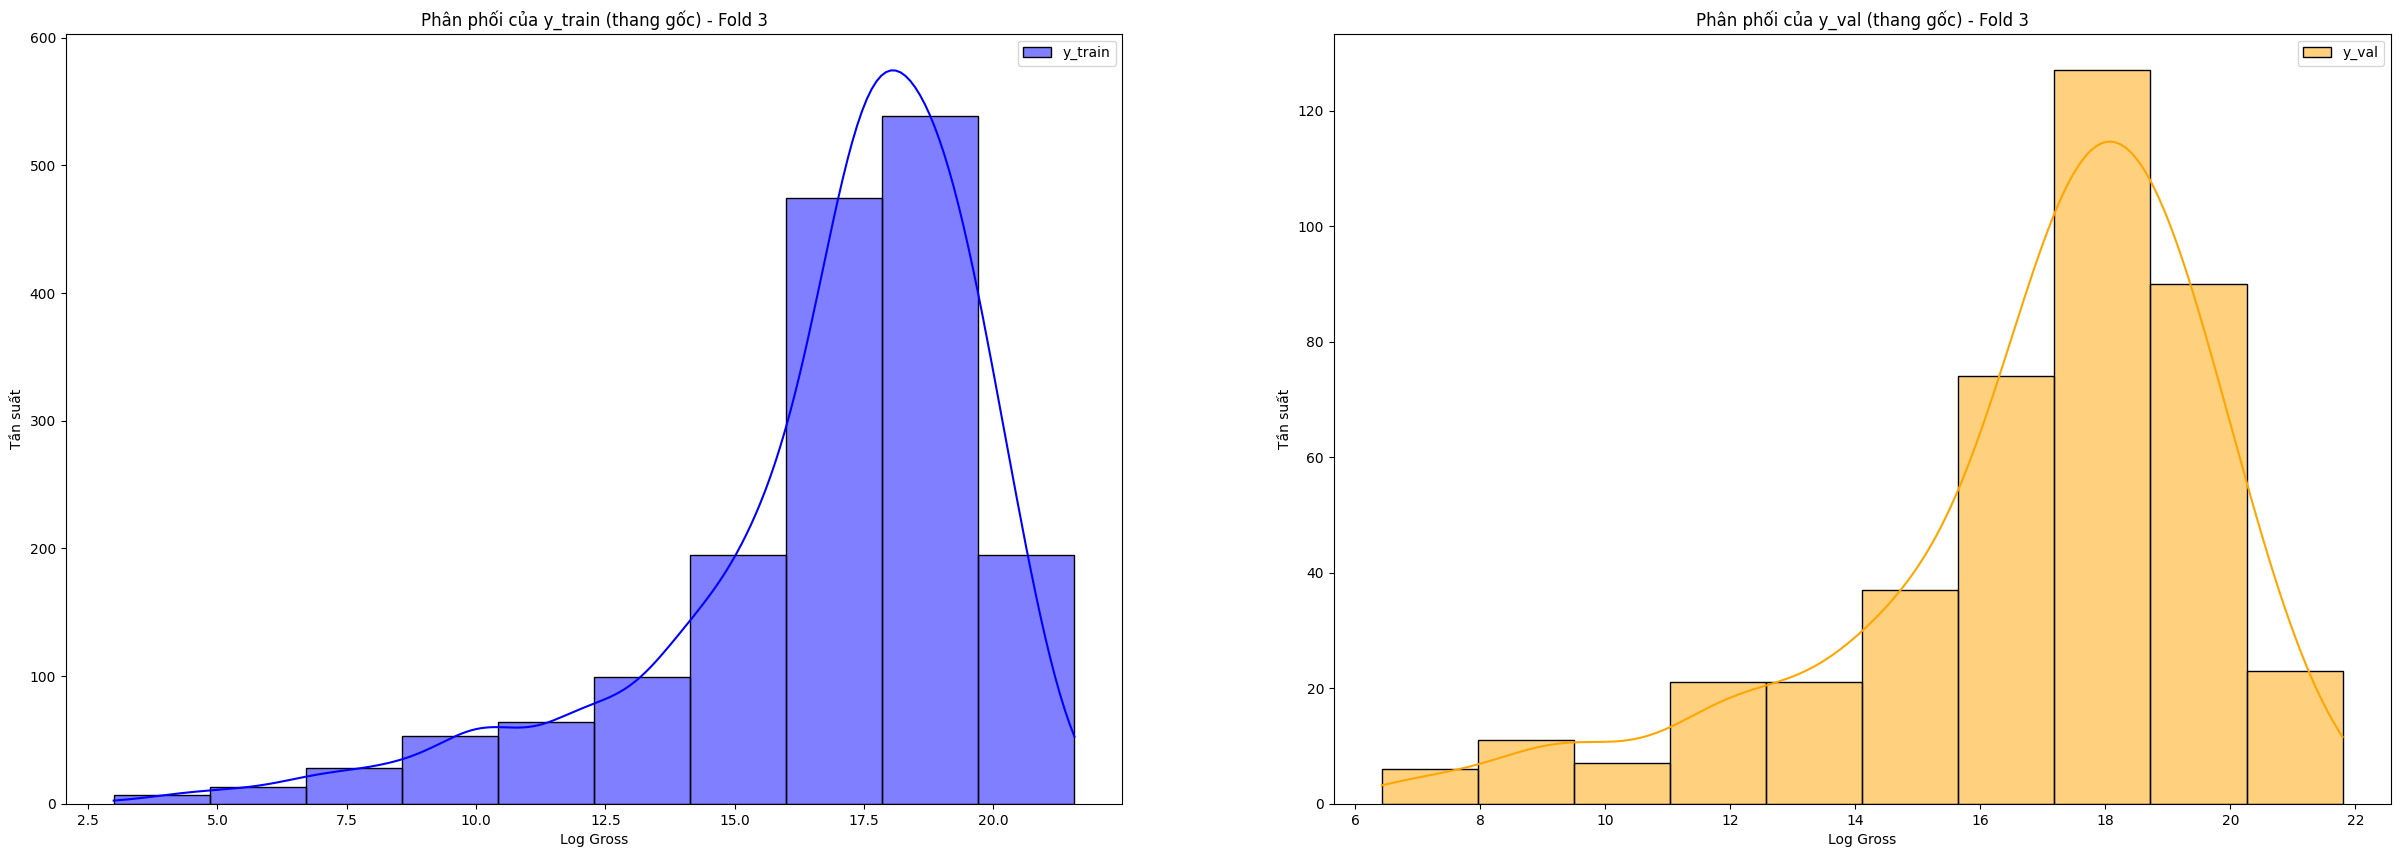

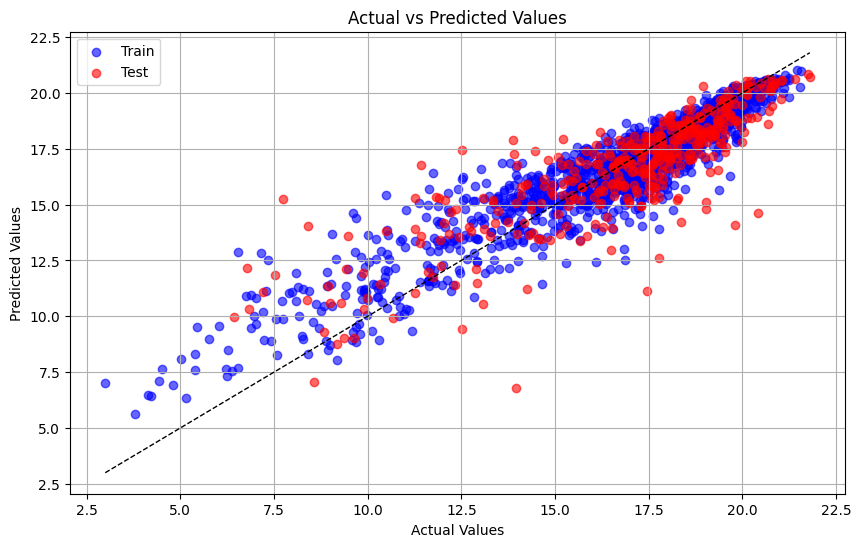

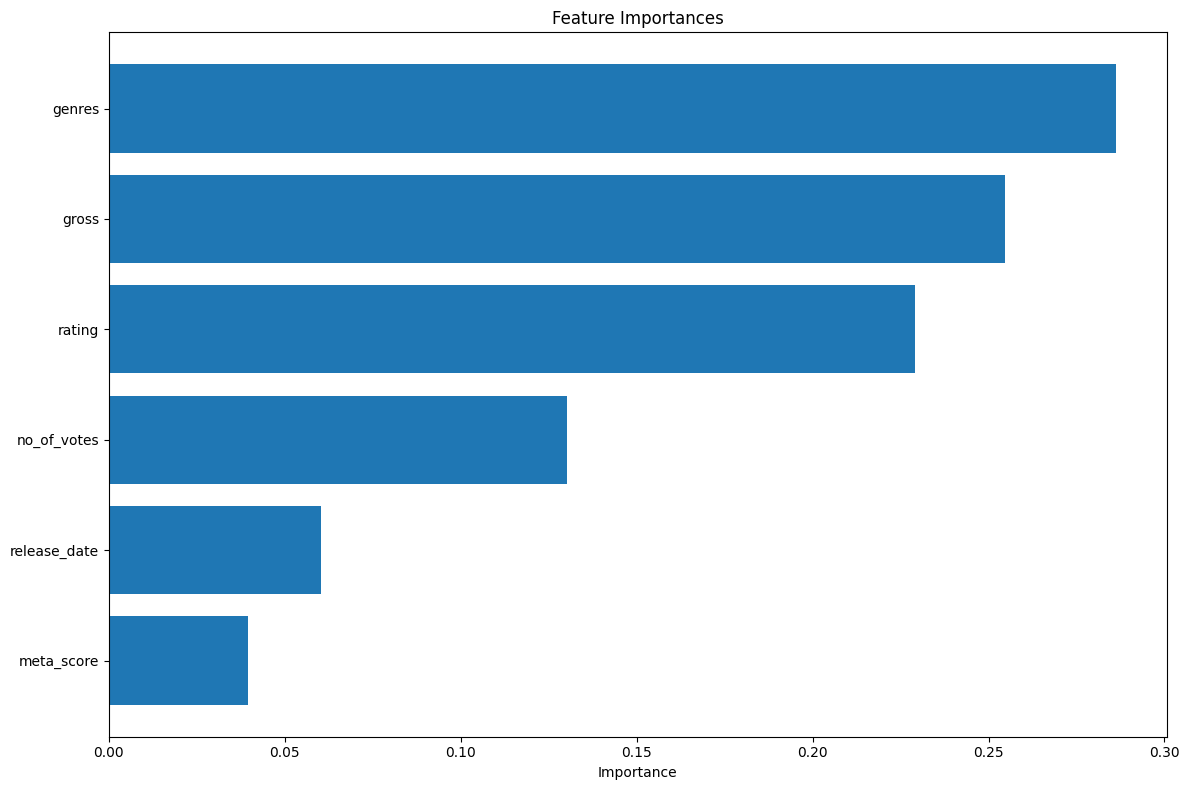


 Fold 4
Fitting 3 folds for each of 24 candidates, totalling 72 fits
 Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training Metrics
R2 score: 0.9201
MSE: 0.7513
MLSE: 0.0049
MAPE: 0.04%
Test Metrics
R2 score: 0.6230
MSE: 3.6622
MLSE: 0.0216
MAPE: 0.10%


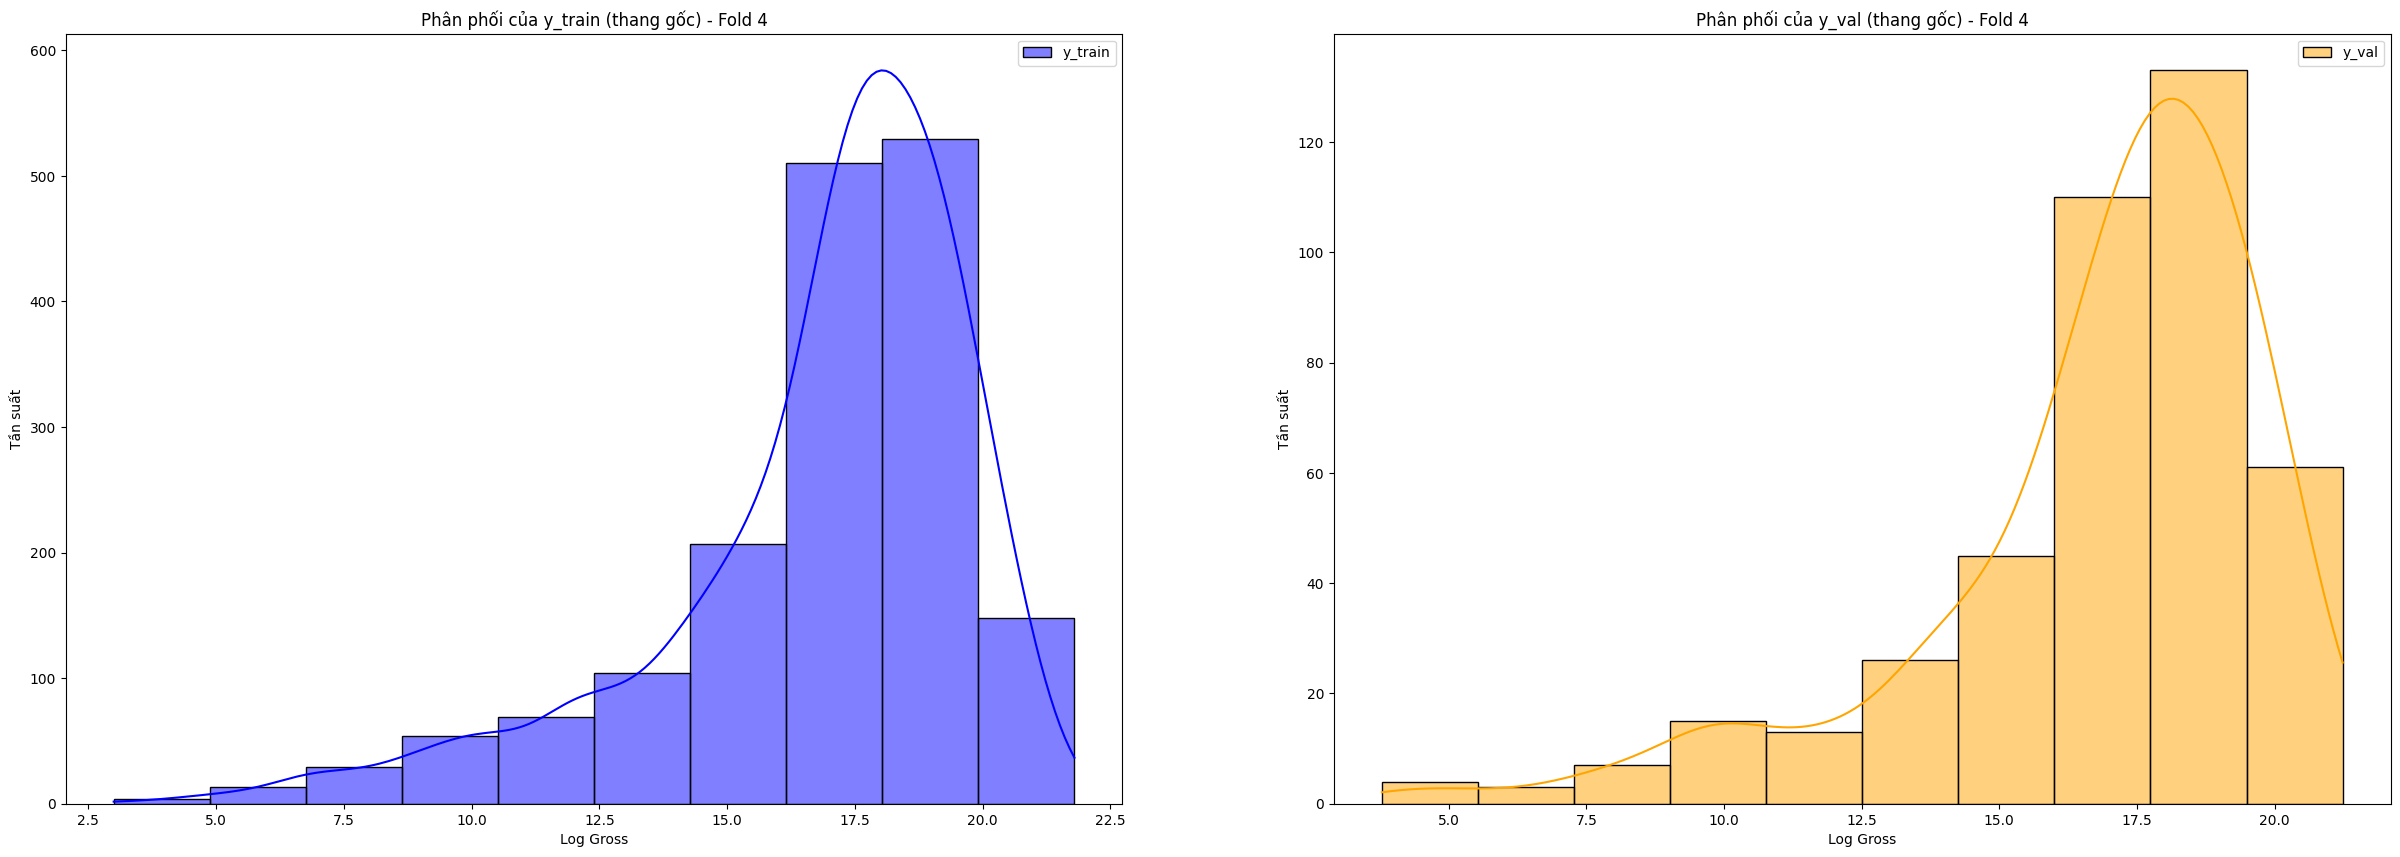

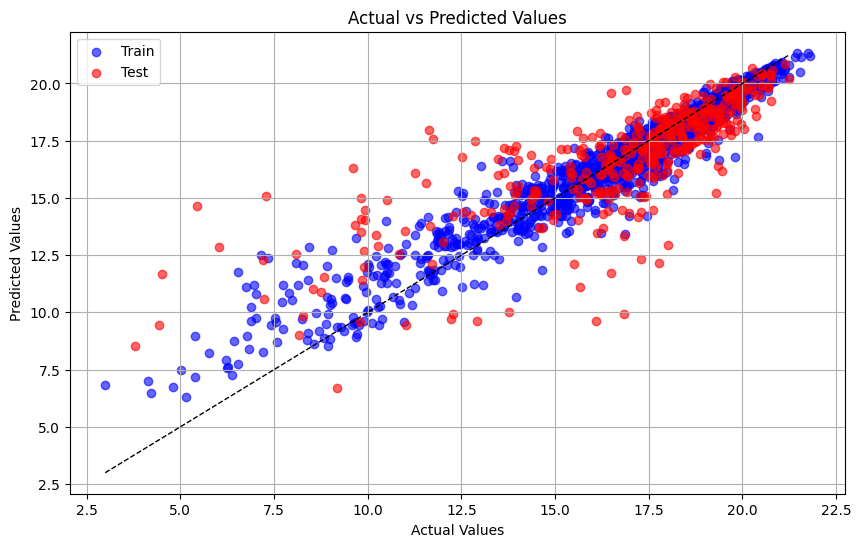

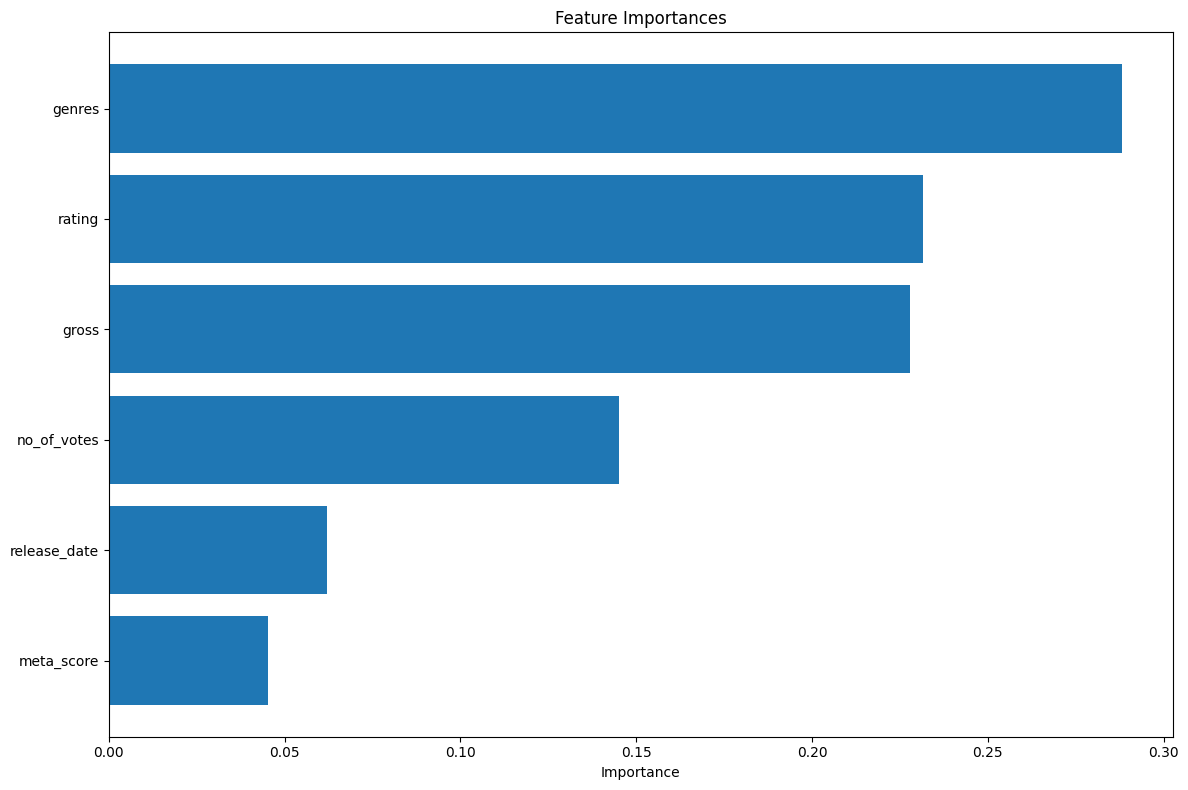


 Fold 5
Fitting 3 folds for each of 24 candidates, totalling 72 fits
 Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
Training Metrics
R2 score: 0.8642
MSE: 1.2937
MLSE: 0.0083
MAPE: 0.06%
Test Metrics
R2 score: 0.6169
MSE: 3.5313
MLSE: 0.0185
MAPE: 0.10%


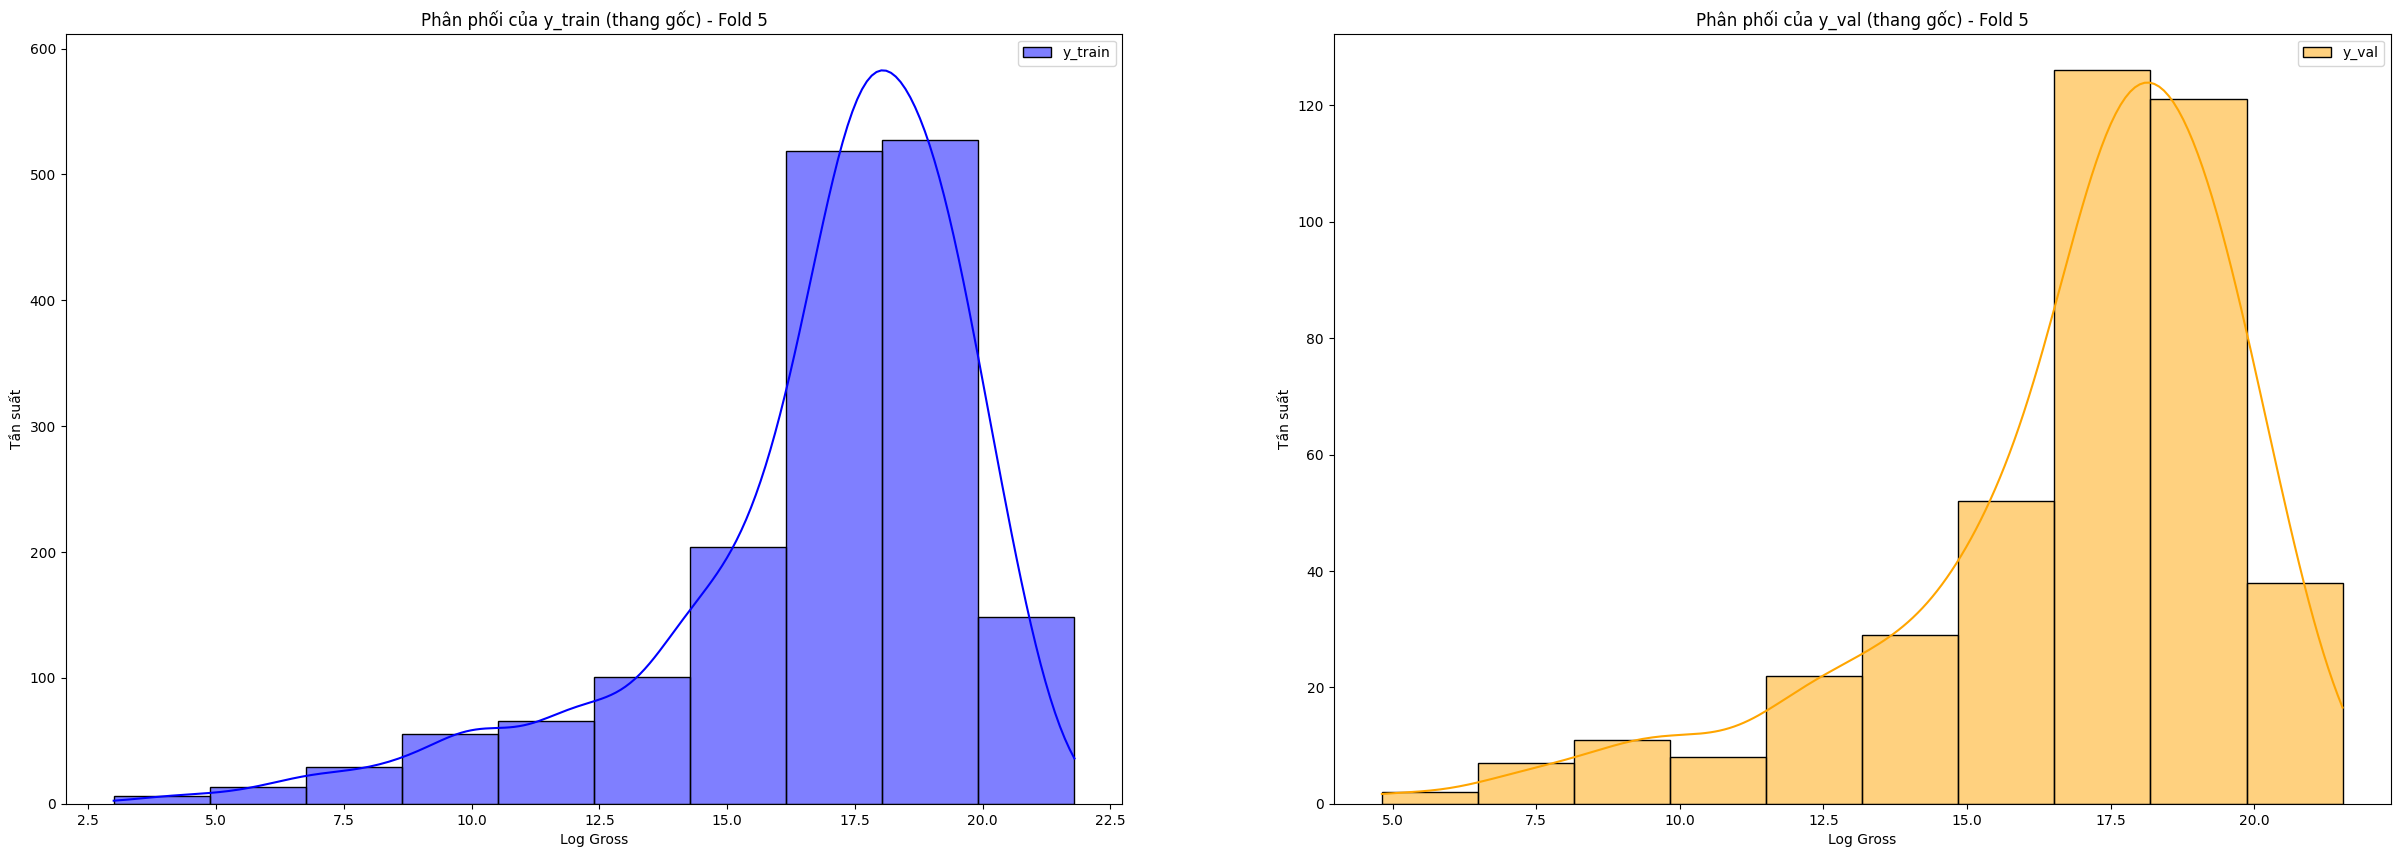

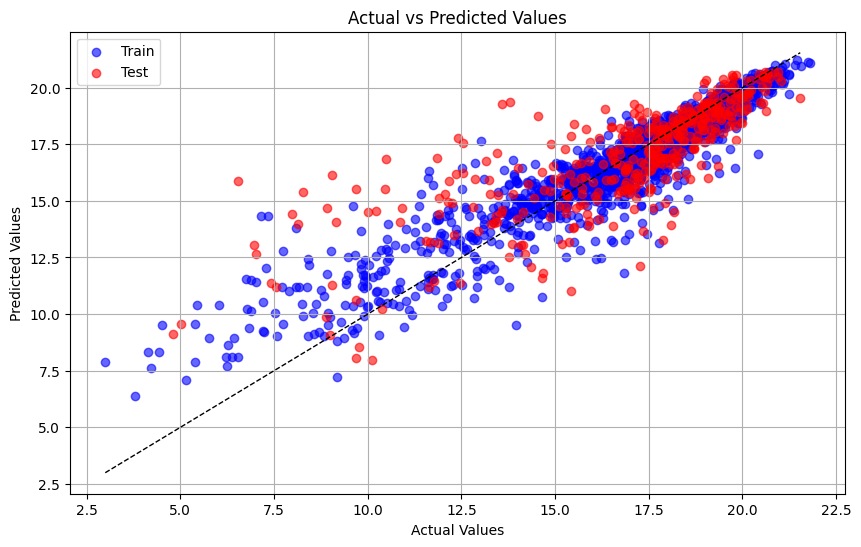

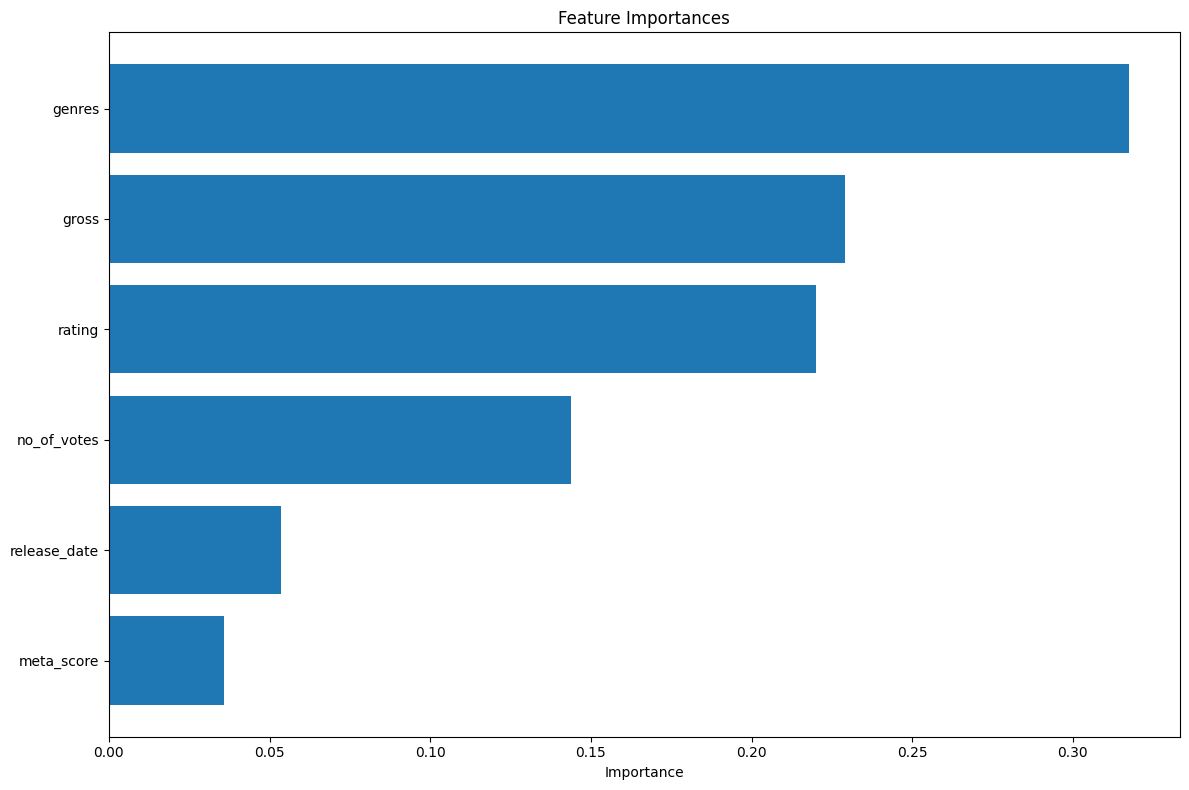

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from evaluation import visualize_results

param_grid = {
    'n_estimators': [200,300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"\n Fold {fold + 1}")
    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()
    
    # Chọn đặc trưng đầu vào và mục tiêu
    #features = ['meta_score', 'rating', 'no_of_votes', 'budget', 'genre_stat_feature', 'country_stat_feature', 'release_date']
    features = ['no_of_votes', 'log_budget',
                'genre_stat_feature','country_stat_feature','rating','release_date']

    target = 'log_gross'


    X_train, y_train, X_val, y_val = processing_data(df_train, df_val, fold=fold,features=features, target=target)

    base_model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(" Best hyperparameters:", grid_search.best_params_)

    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)

    visualize_results(
        y_train, train_preds,
        y_val, val_preds,
        model=best_model,
        df=df,
        is_logged=False,
    )


#### Thư viện Optuna


Fold 1
 Best hyperparameters: {'n_estimators': 432, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True}
 Best MSE: 3.529585420476255
 Hiển thị quá trình tối ưu:


Training Metrics
R2 score: 0.7824
MSE: 2.0697
MLSE: 0.0120
MAPE: 0.07%
Test Metrics
R2 score: 0.7182
MSE: 2.6145
MLSE: 0.0162
MAPE: 0.08%


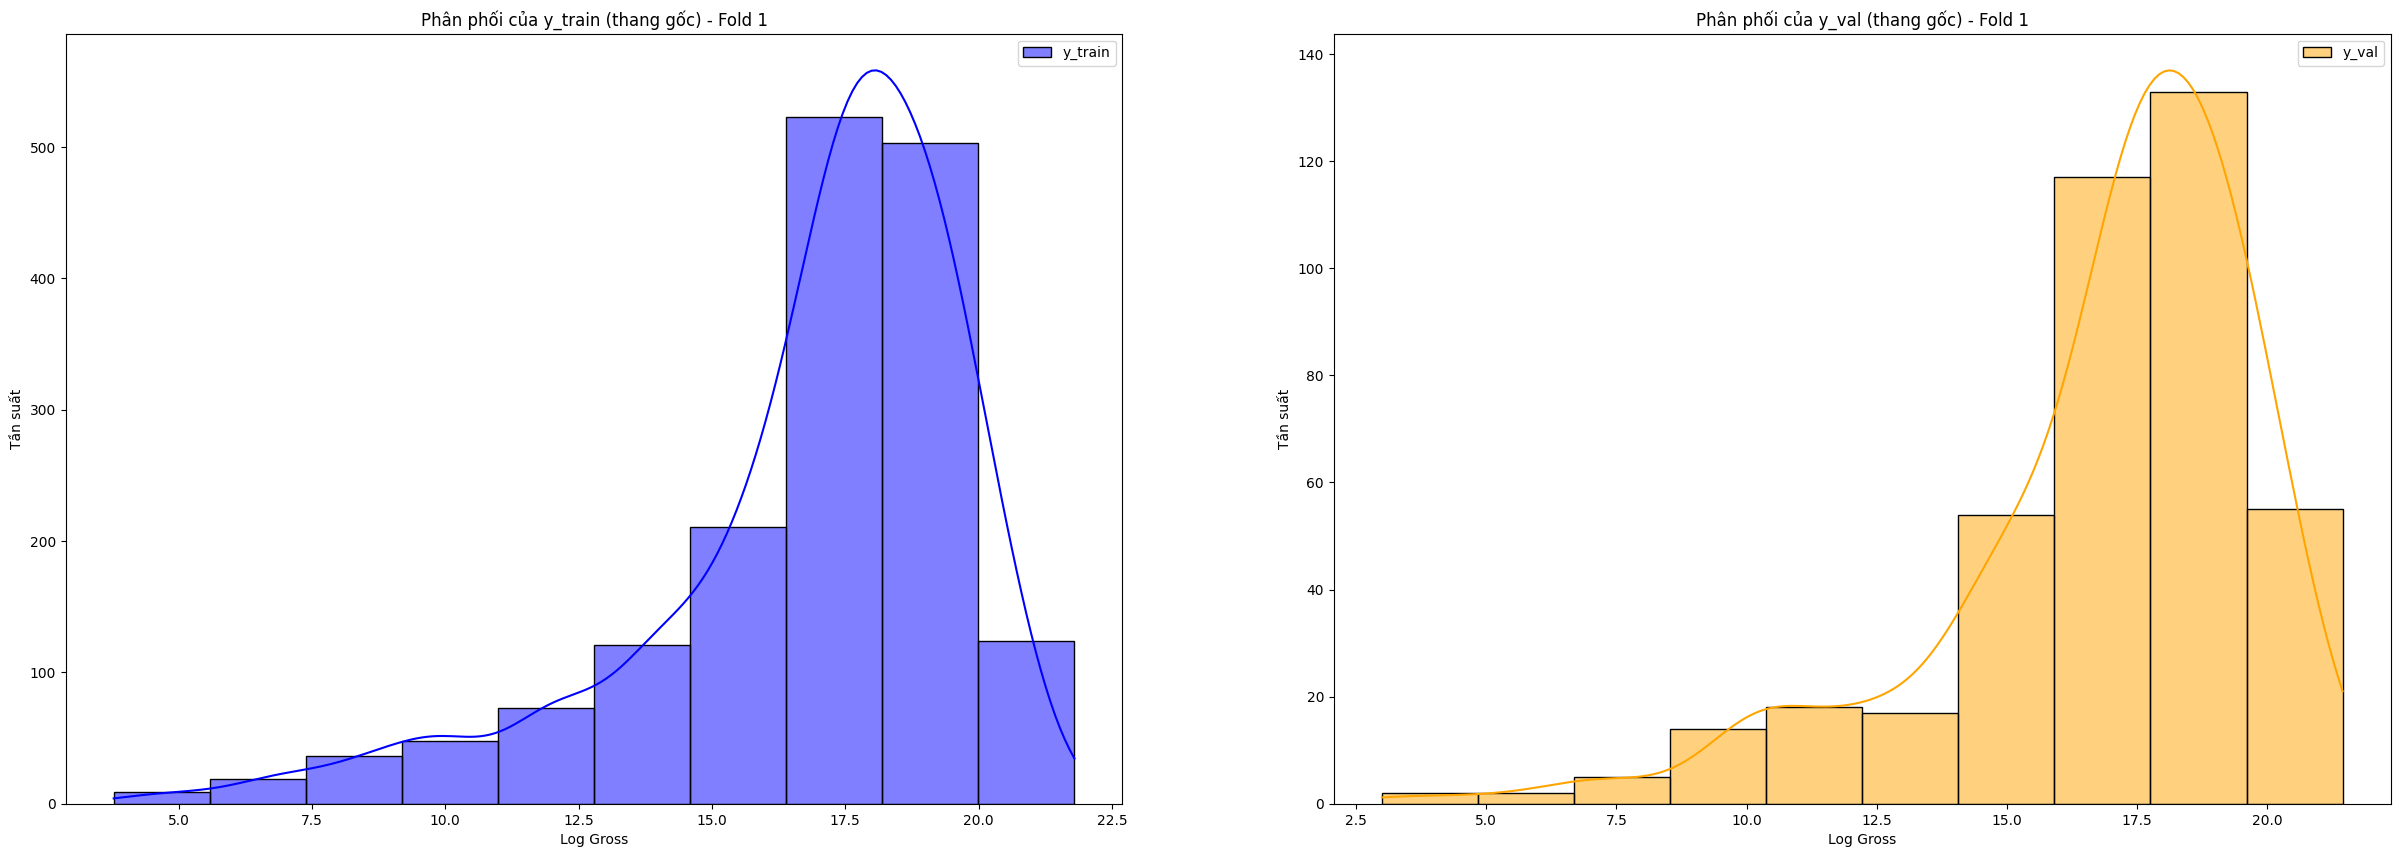

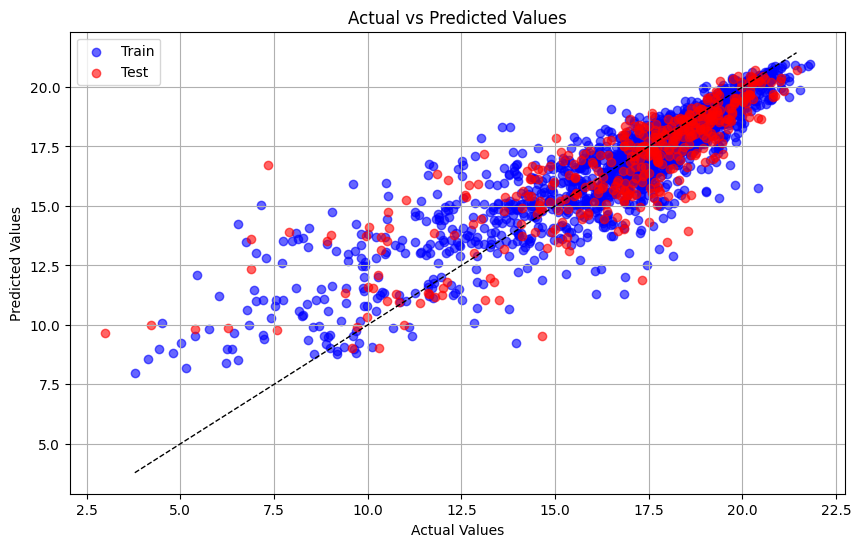

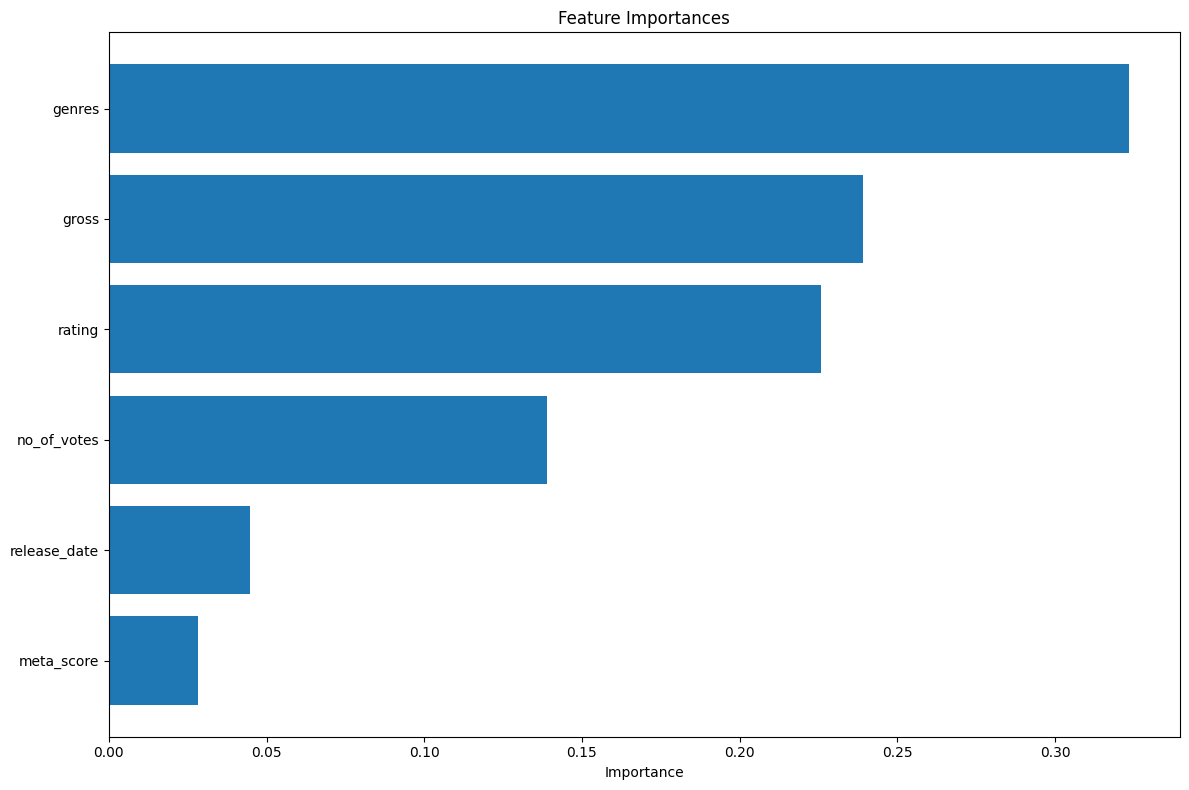


Fold 2
 Best hyperparameters: {'n_estimators': 249, 'max_depth': None, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}
 Best MSE: 3.1940064366254215
 Hiển thị quá trình tối ưu:


Training Metrics
R2 score: 0.8507
MSE: 1.3796
MLSE: 0.0086
MAPE: 0.06%
Test Metrics
R2 score: 0.6718
MSE: 3.4021
MLSE: 0.0197
MAPE: 0.09%


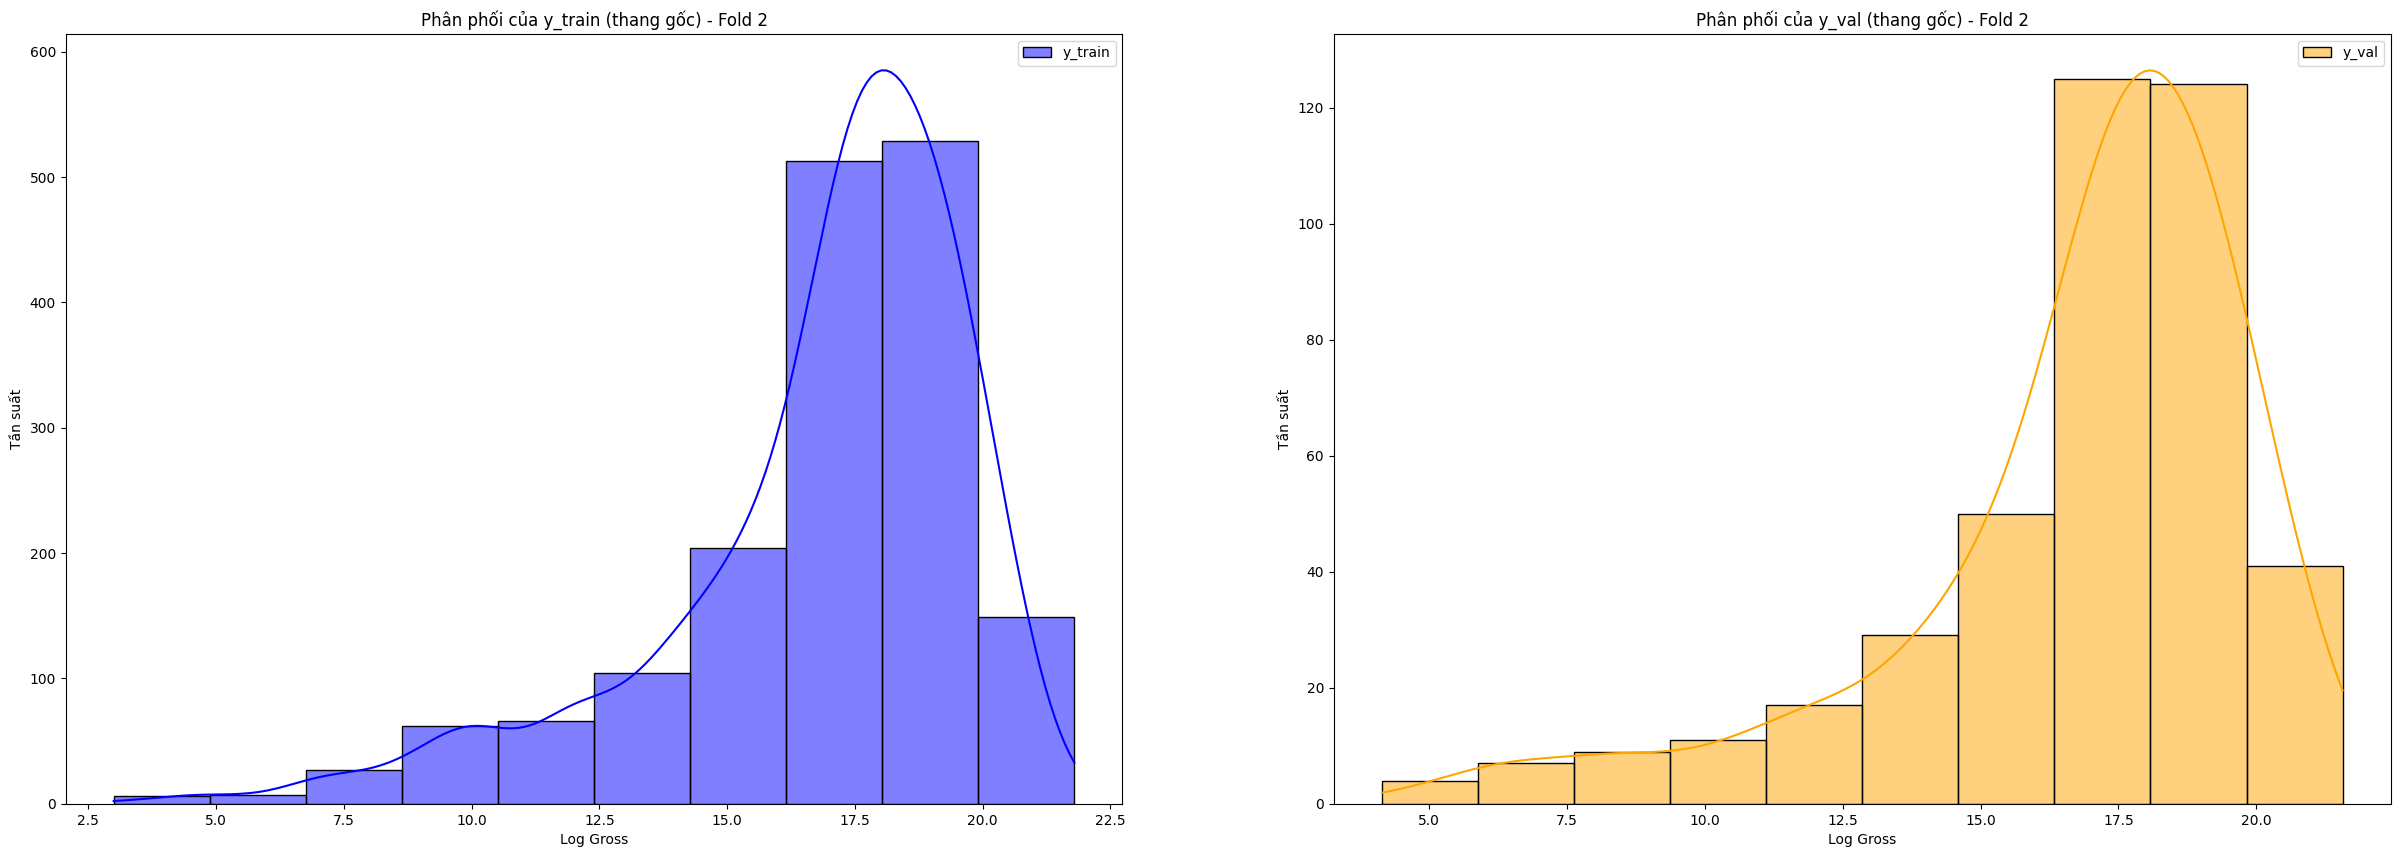

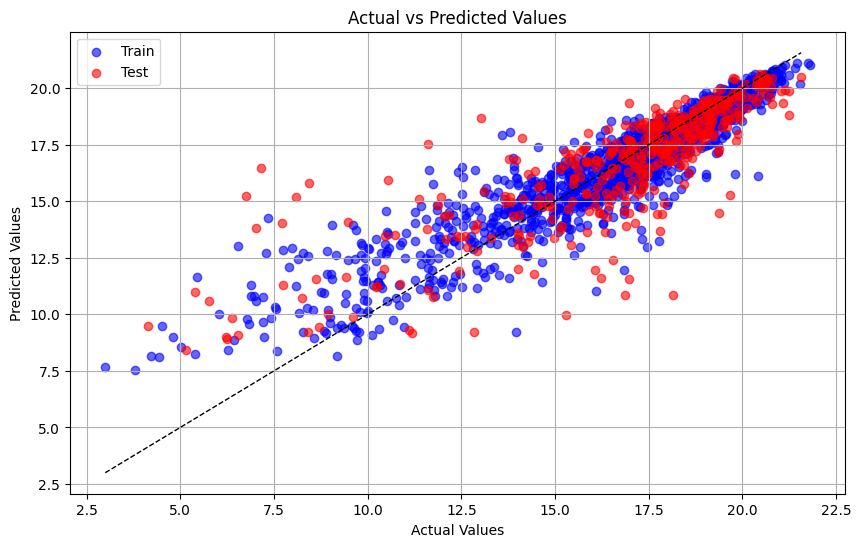

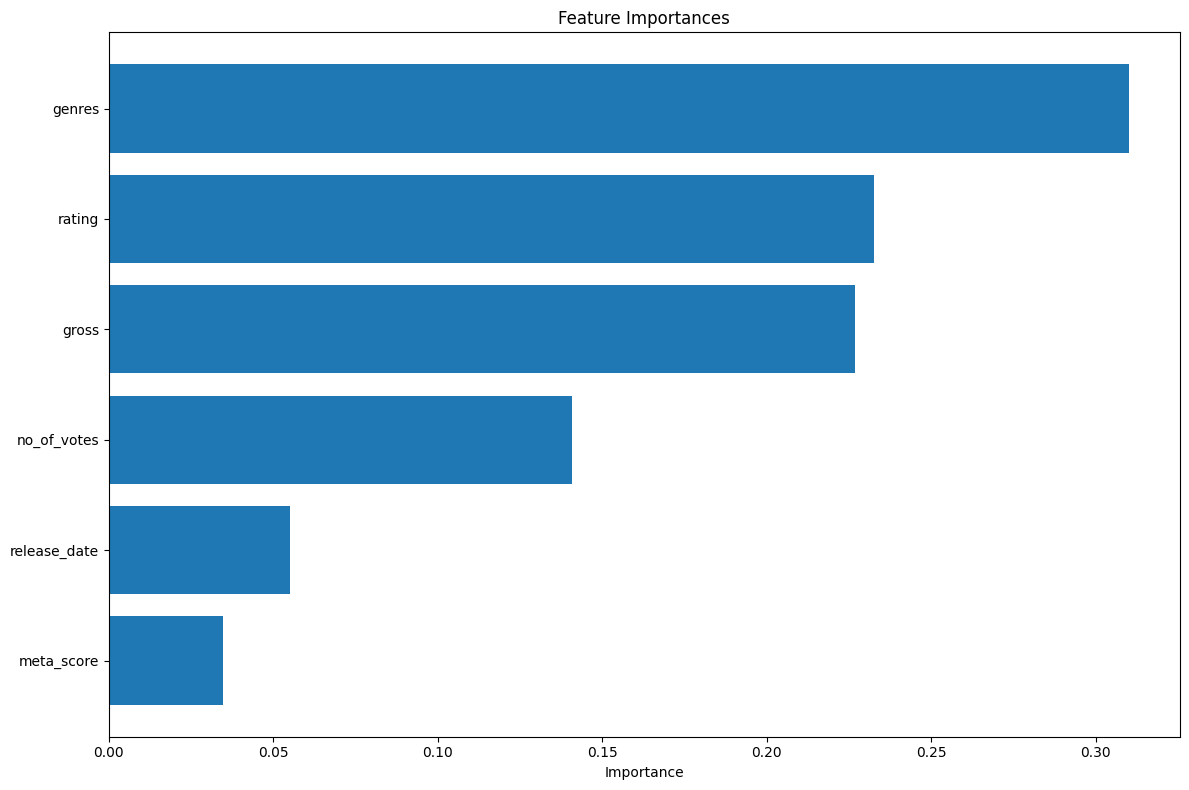


Fold 3
 Best hyperparameters: {'n_estimators': 199, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}
 Best MSE: 3.3737992515204938
 Hiển thị quá trình tối ưu:


Training Metrics
R2 score: 0.8965
MSE: 0.9978
MLSE: 0.0066
MAPE: 0.05%
Test Metrics
R2 score: 0.6992
MSE: 2.6321
MLSE: 0.0128
MAPE: 0.08%


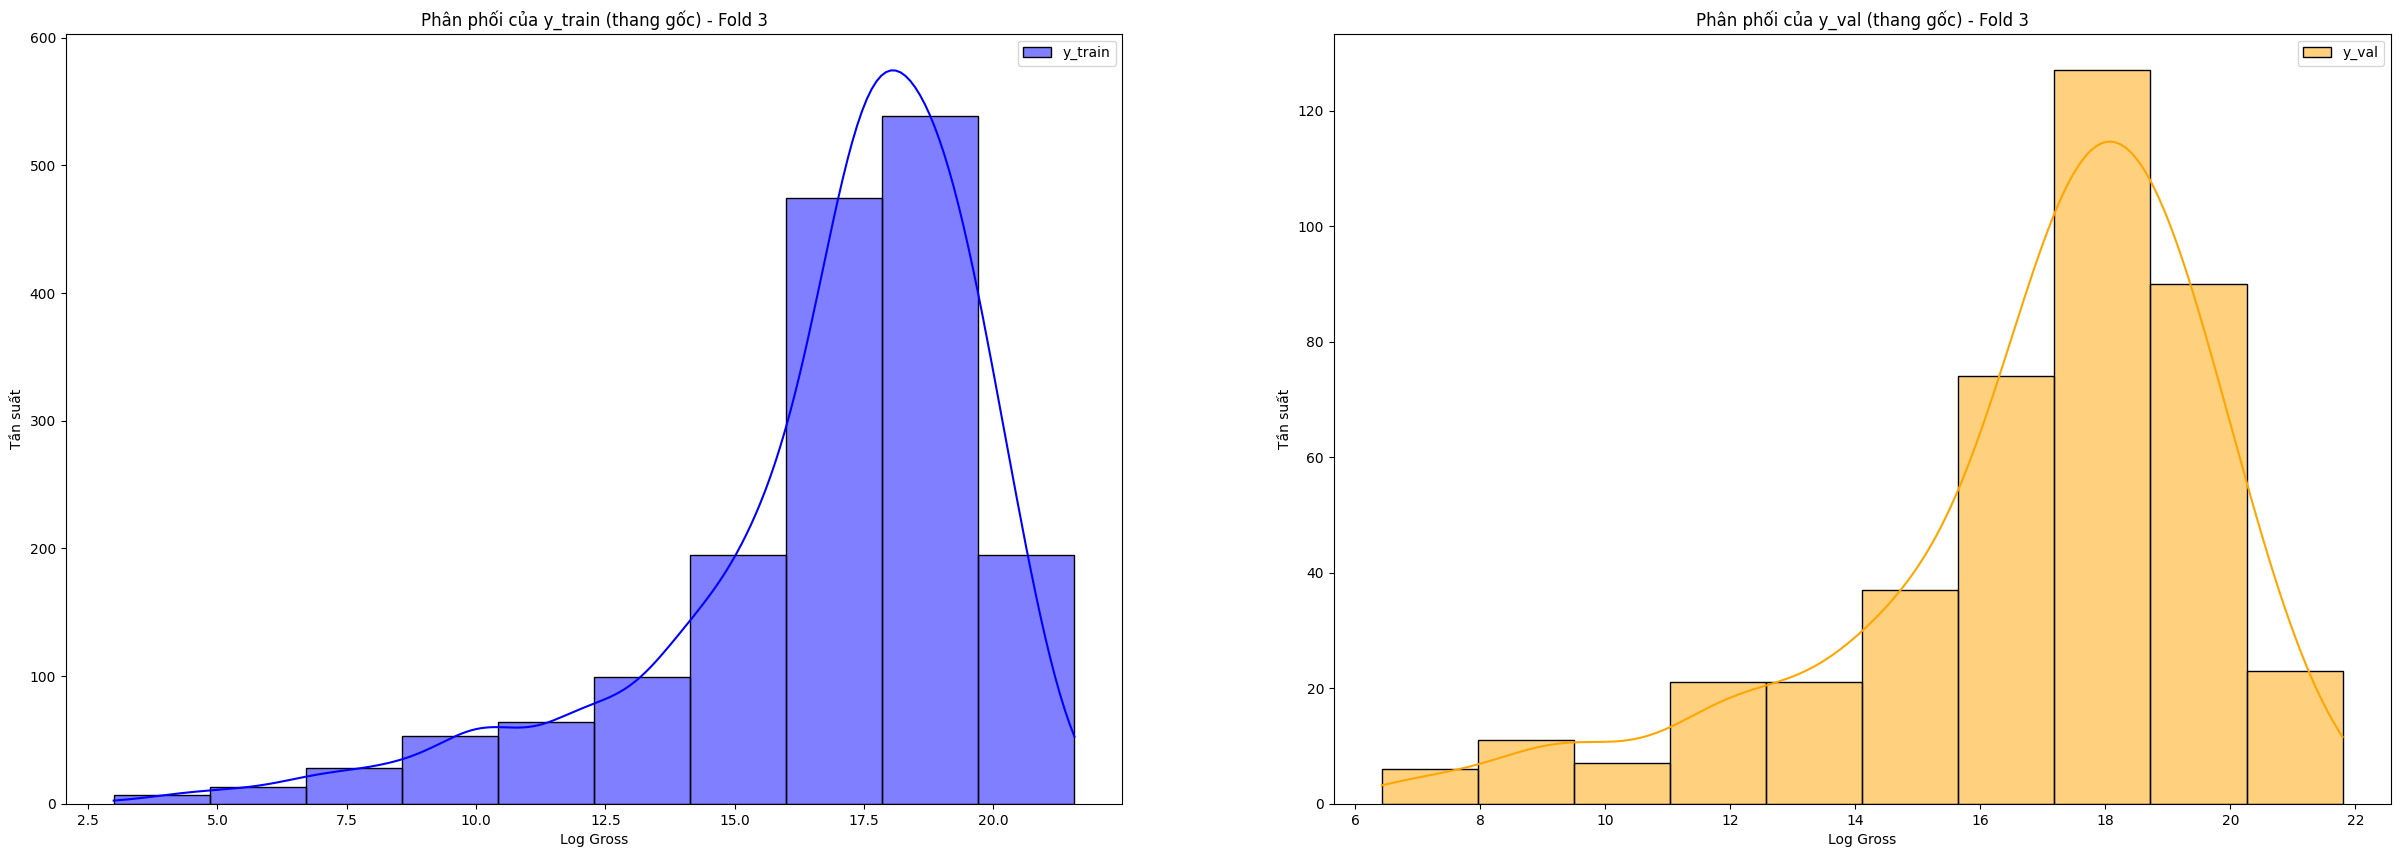

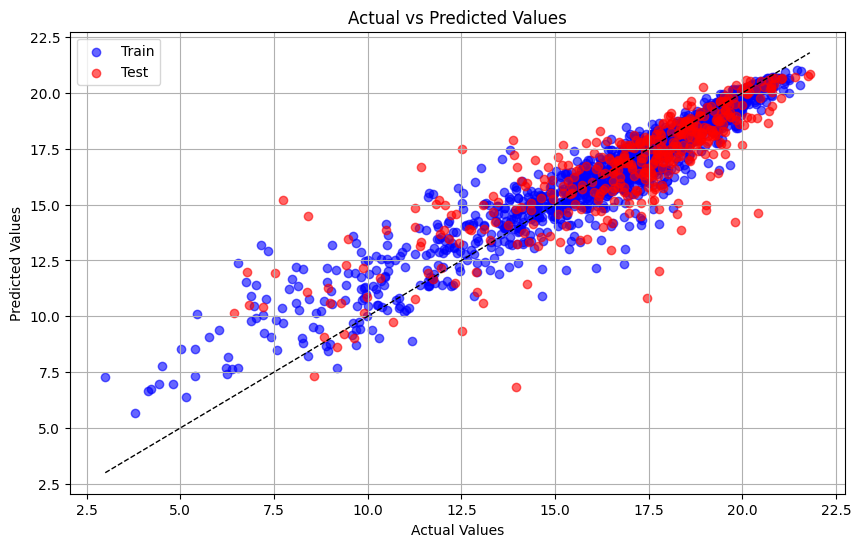

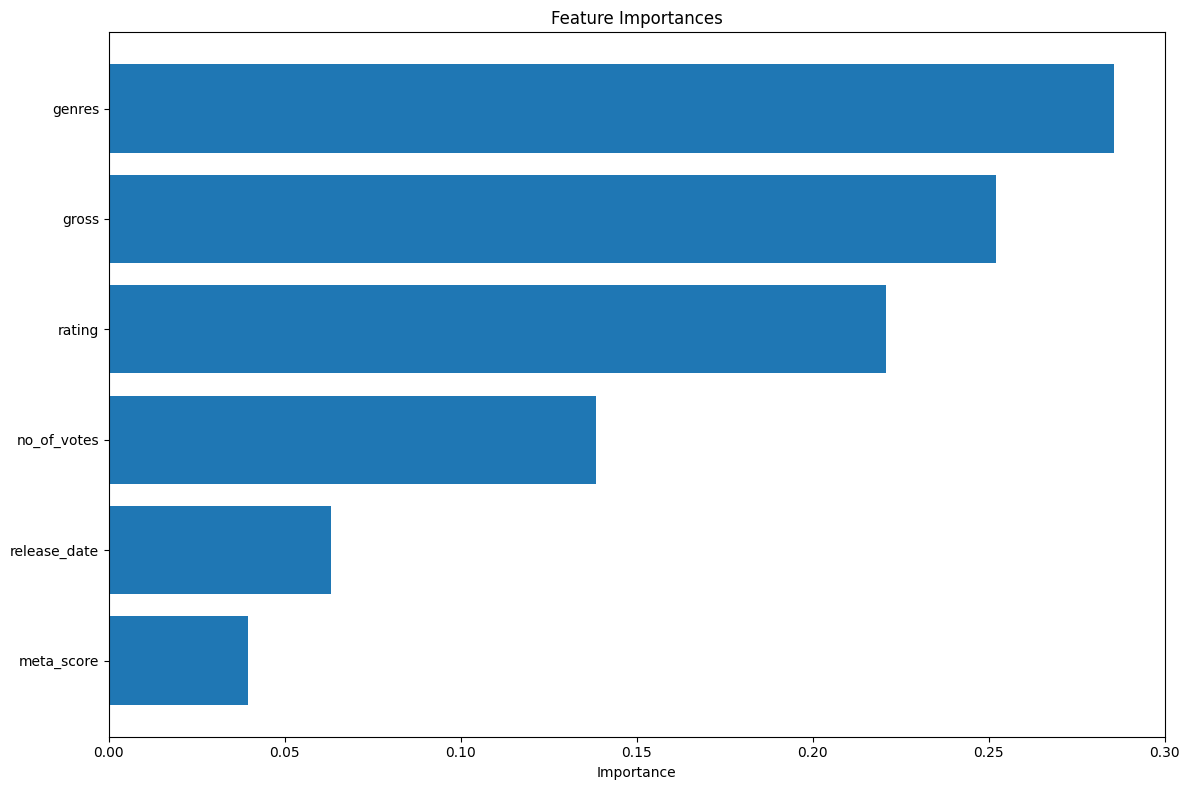


Fold 4
 Best hyperparameters: {'n_estimators': 163, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}
 Best MSE: 3.1194403244800823
 Hiển thị quá trình tối ưu:


Training Metrics
R2 score: 0.9020
MSE: 0.9215
MLSE: 0.0059
MAPE: 0.05%
Test Metrics
R2 score: 0.6242
MSE: 3.6499
MLSE: 0.0216
MAPE: 0.10%


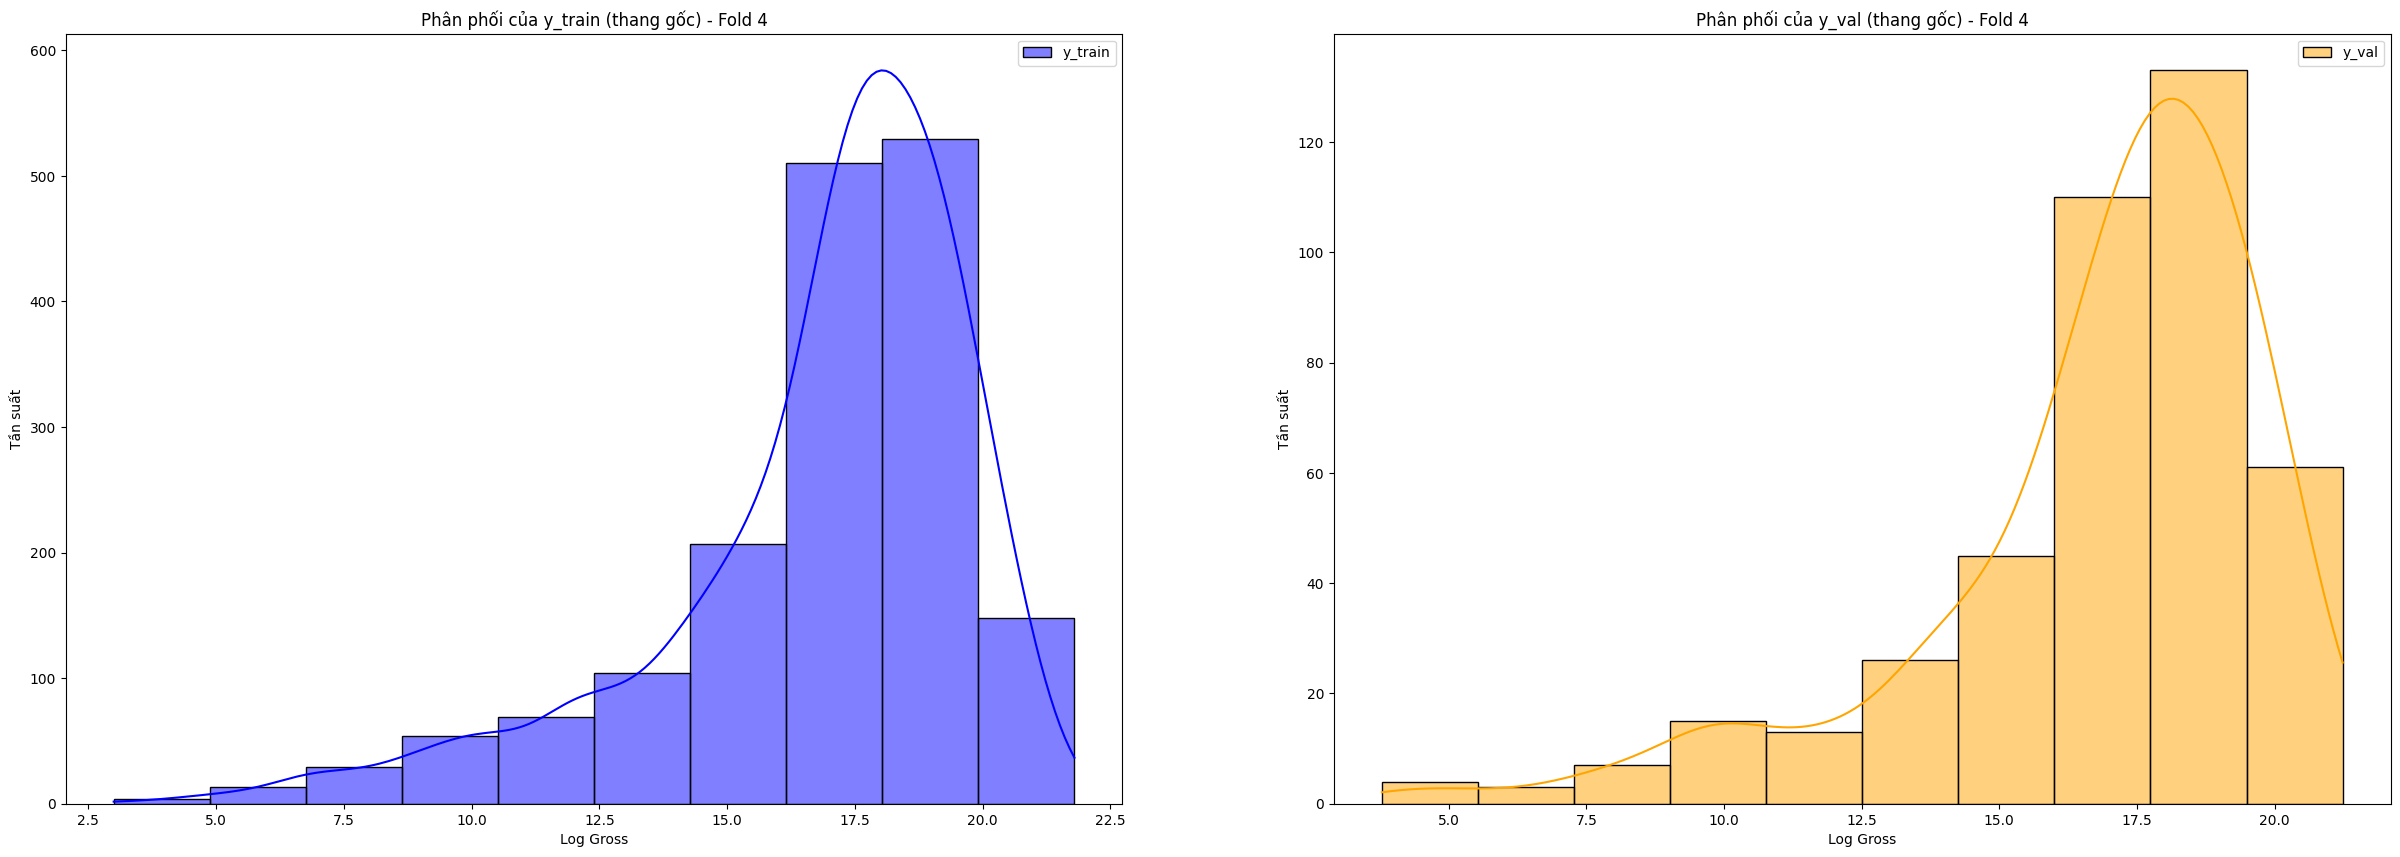

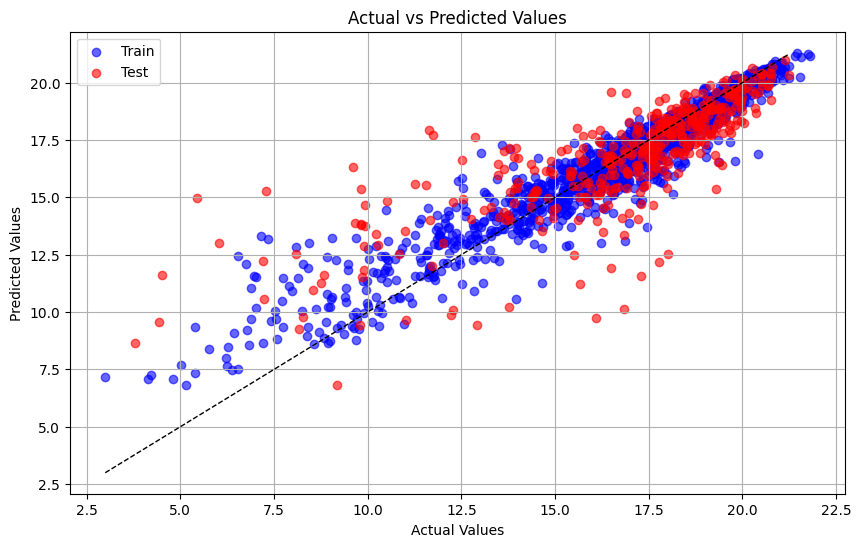

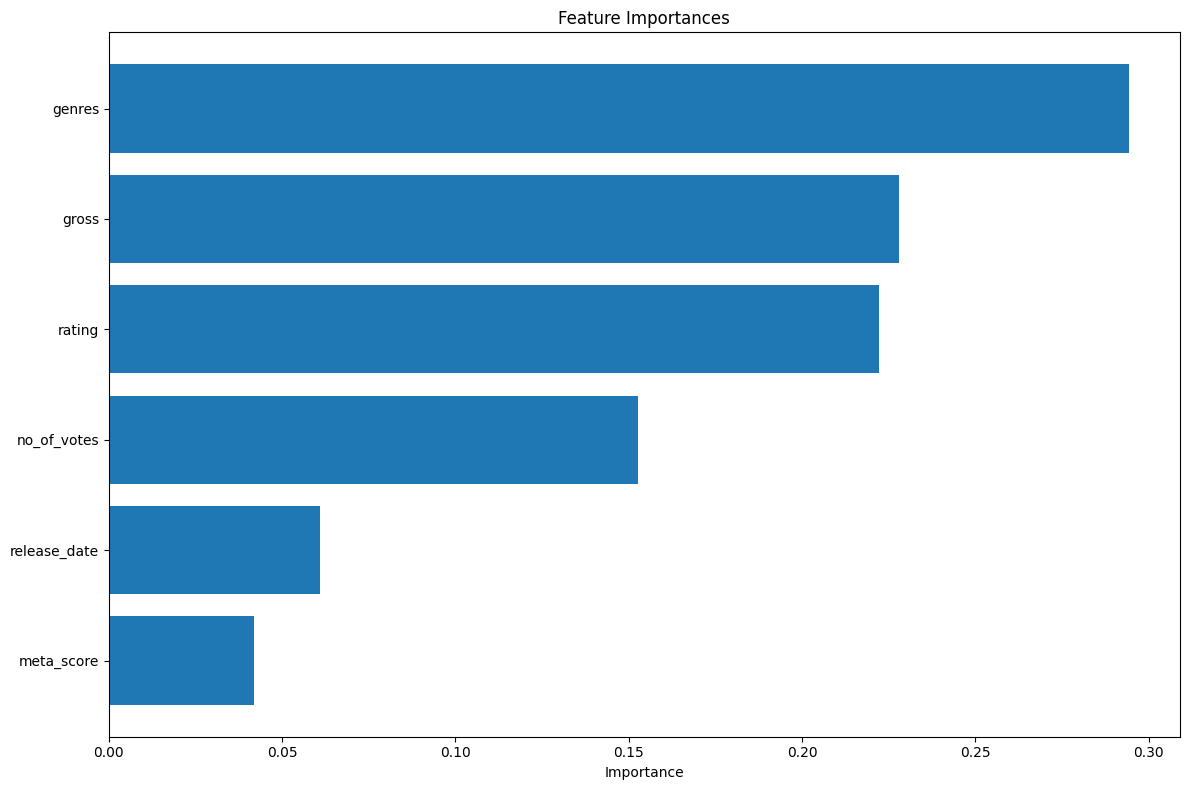


Fold 5
 Best hyperparameters: {'n_estimators': 138, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}
 Best MSE: 3.2477171631992143
 Hiển thị quá trình tối ưu:


Training Metrics
R2 score: 0.8363
MSE: 1.5592
MLSE: 0.0098
MAPE: 0.06%
Test Metrics
R2 score: 0.6223
MSE: 3.4818
MLSE: 0.0184
MAPE: 0.10%


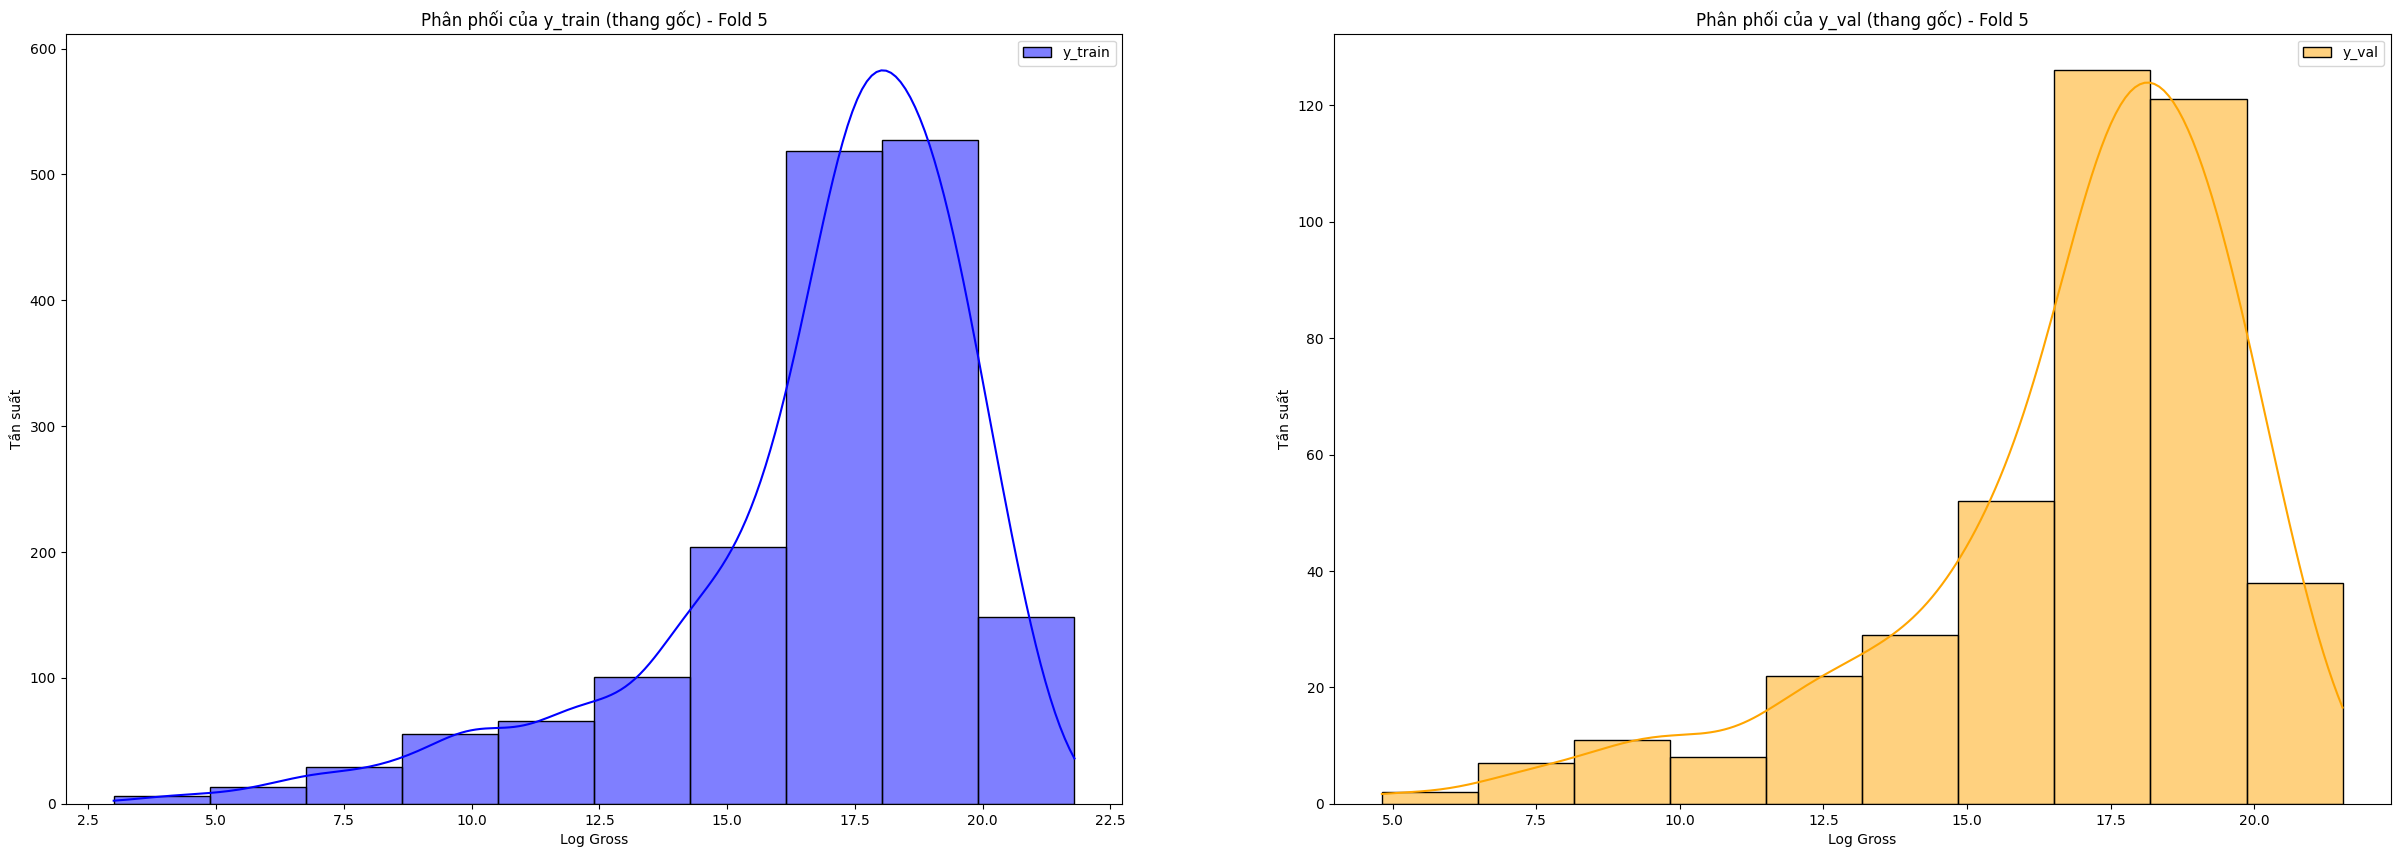

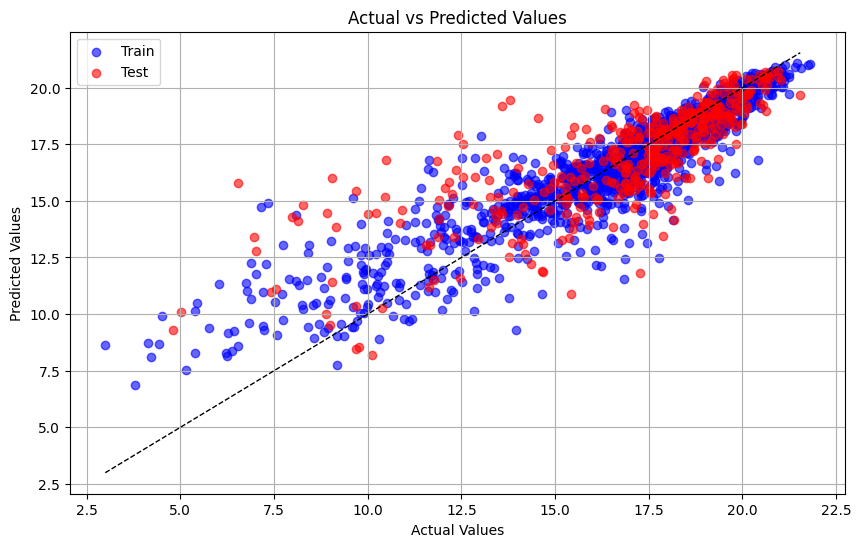

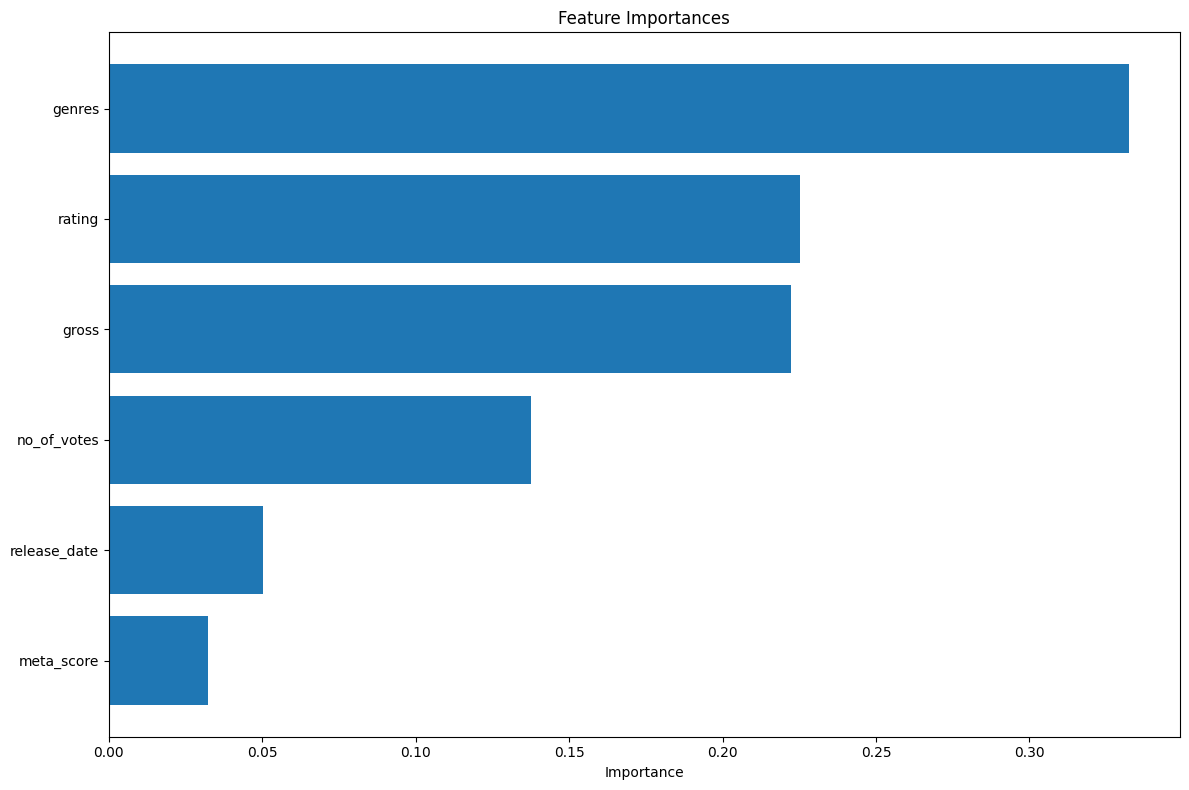

In [ ]:
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"\nFold {fold + 1}")
    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()

    # Chọn đặc trưng đầu vào và mục tiêu
    #features = ['meta_score', 'rating', 'no_of_votes', 'budget', 'genre_stat_feature', 'country_stat_feature', 'release_date']
    features = ['no_of_votes', 'log_budget',
                'genre_stat_feature','country_stat_feature','rating','release_date']

    target = 'log_gross'

    X_train, y_train, X_val, y_val = processing_data(df_train, df_val, fold=fold,features=features, target=target)

    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 500),
            'max_depth': trial.suggest_categorical('max_depth', [5, 10, 20, None]),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
            'max_features': trial.suggest_categorical('max_features', ['sqrt']),
            'bootstrap': trial.suggest_categorical('bootstrap', [True]),
            'random_state': 42,
            'n_jobs': -1
        }

        model = RandomForestRegressor(**params)
        score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3).mean()
        return -score  # minimize MSE

    #  Tạo study với tên rõ ràng theo từng fold
    study = optuna.create_study(direction="minimize", study_name=f"Fold_{fold+1}_RandomForest")
    study.optimize(objective, n_trials=30)

    print(" Best hyperparameters:", study.best_params)
    print(" Best MSE:", study.best_value)

    best_model = RandomForestRegressor(**study.best_params, random_state=42, n_jobs=-1)
    best_model.fit(X_train, y_train)

    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)

    #  Vẽ biểu đồ tối ưu và tầm quan trọng tham số
    print(" Hiển thị quá trình tối ưu:")
    plot_optimization_history(study).show()
    plot_param_importances(study).show()

    visualize_results(
        y_train, train_preds,
        y_val, val_preds,
        model=best_model,
        df=df,
        is_logged=False,
    )
